# - The project :: Income-Person-Prediction-Project
*****************************************************************
<img src="images/medical.jpg" />


* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src="images/image.png" />


* Domain-Knowledge ::
    * IToday we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.

        
<img src="images/present.gif" />

    


# overview about How ML Solve That Problem of classifier :: 
***********************************
        
<img src="images/Process.jpg" />

* Importing requried liberaries and Frameworks  ::

In [1]:
# Importing Liberaries and Framworks ::
import numpy     as np      # Apply Linear_Algebra operations and deal with arrays.
import pandas    as pd      # For Loading diff formats of data and Apply Wrangling and Mainpulating on data
import seaborn   as sns     # For Visualizing data
import warnings  as w       # For Ignoring any Warning
import missingno as mno     # Presnt Precentage of Nan Values
import datasist  as ds      # For Apply EDA and Visualization Using Simple Implementation
import matplotlib.pyplot as plt # For Set Plots , Charts and Maps Labels and Title  
import pandas_profiling  as pp  # To get describtion file of data


* Set some instructions

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)

In [3]:
# Loading dataset ::
df = pd.read_csv("insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

* from thae result above we can see that ::
*********************************************************
* We have 1338 record of data.
* we have 7 features related Income.
* Our-Target income that we will rename that columns into charges.

*******************************************************
# Features of Income data :
*******************************************************

* age      : Age of primary beneficiary.
    
* sex      : Insurance contractor gender, female, male
* bmi      : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9  

* children : Number of children covered by health insurance / Number of dependents.

* smoker   :  Refer the smoker case of the person smoke or not smoke.

* region   : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest..

* charges  : Individual medical costs billed by health insurance knowledgethat is our target which we need to predict it using ML Models.

*******************************
 


<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
*******************************
 *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

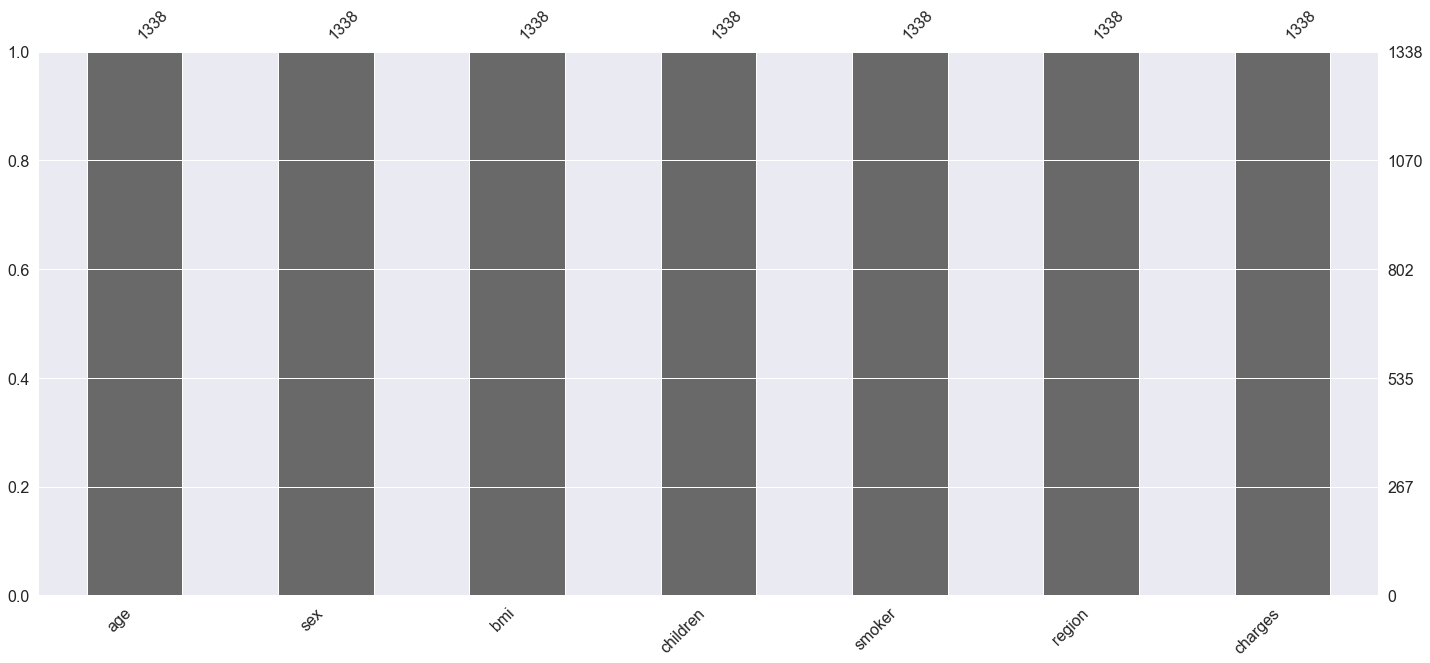

In [7]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (age)

The Col _ (age) _Unique_values :: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

The Col _ (age)_Value_counts :: 

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

-----------
-----------

The Col :: (sex)

The Col _ (sex) _Unique_values :: ['female' 'male']

The Col _ (sex)_Value_counts :: 

male      676
female    662
Name: sex, dtype: int64

-----------
-----------

The Col :: (bmi)

The Col _ (bmi) _Unique_values :: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.8

In [10]:
# Present the Statistical Analysis describtion of Numerical_data ::
df.describe(include=["number"])

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [11]:
# present the Statistical Analysis description of Categorical_data ::
df.describe(include="object")

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

In [12]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
# check data include duplicates record or not
df.duplicated().sum()


1

* From the result above we can see that data include repeat data record we Must remove all redendunt data.

In [14]:
# Droping All repeat or Redendant data.
df.drop_duplicates(inplace=True)

In [15]:
# check data include duplicates record or not
df.duplicated().sum()


0

In [16]:
# Checking dtypes of dataset.
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

* Wrangling and Mainplluting data.

In [17]:
# Get The Record Of the Person who max age ::
df[df["age"] == df["age"].max()]

age     sex     bmi  children smoker     region      charges
62     64    male  24.700         1     no  northwest  30166.61817
94     64  female  31.300         2    yes  southwest  47291.05500
199    64  female  39.330         0     no  northeast  14901.51670
328    64  female  33.800         1    yes  southwest  47928.03000
335    64    male  34.500         0     no  southwest  13822.80300
378    64  female  30.115         3     no  northwest  16455.70785
398    64    male  25.600         2     no  southwest  14988.43200
402    64  female  32.965         0     no  northwest  14692.66935
418    64    male  39.160         1     no  southeast  14418.28040
420    64    male  33.880         0    yes  southeast  46889.26120
534    64    male  40.480         0     no  southeast  13831.11520
603    64  female  39.050         3     no  southeast  16085.12750
635    64    male  38.190         0     no  northeast  14410.93210
664    64  female  22.990         0    yes  southeast  27037.91410
752    64    male  37.905         0     no  northwest  14210.53595
768    64  female  39.700         0     no  southwest  14319.03100
801    64  female  35.970         0     no  southeast  14313.84630
825    64  female  31.825         2     no  northeast  16069.08475
890    64  female  26.885         0    yes  northwest  29330.98315
1051   64    male  26.410         0     no  northeast  14394.55790
1241   64    male  36.960         2    yes  southeast  49577.66240
1265   64    male  23.760         0    yes  southeast  26926.51440

In [18]:
# Get The Record of the Min age ::
df[df["age"] == df["age"].min()]

age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
22     18    male  34.100         0     no  southeast   1137.01100
31     18  female  26.315         0     no  northeast   2198.18985
46     18  female  38.665         2     no  northeast   3393.35635
50     18  female  35.625         0     no  northeast   2211.13075
...   ...     ...     ...       ...    ...        ...          ...
1296   18    male  26.125         0     no  northeast   1708.92575
1315   18    male  28.310         1     no  northeast  11272.33139
1317   18    male  53.130         0     no  southeast   1163.46270
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350

[69 rows x 7 columns]

In [19]:
# Get The Record Of the Person who max bmi ::
df[df["bmi"] == df["bmi"].max()]

age   sex    bmi  children smoker     region    charges
1317   18  male  53.13         0     no  southeast  1163.4627

In [20]:
# Get The Record of the Min bmi ::
df[df["bmi"] == df["bmi"].min()]

age   sex    bmi  children smoker     region    charges
172   18  male  15.96         0     no  northeast  1694.7964

In [21]:
# Get The Record Of the Clients who max children ::
df[df["children"] == df["children"].max()]

age     sex     bmi  children smoker     region      charges
32     19  female  28.600         5     no  southwest   4687.79700
71     31    male  28.500         5     no  northeast   6799.45800
166    20  female  37.000         5     no  southwest   4830.63000
413    25    male  23.900         5     no  southwest   5080.09600
425    45    male  24.310         5     no  southeast   9788.86590
438    52  female  46.750         5     no  southeast  12592.53450
568    49  female  31.900         5     no  southwest  11552.90400
640    33    male  42.400         5     no  southwest   6666.24300
877    33    male  33.440         5     no  southeast   6653.78860
932    46    male  25.800         5     no  southwest  10096.97000
937    39  female  24.225         5     no  northwest   8965.79575
969    39  female  34.320         5     no  southeast   8596.82780
984    20    male  30.115         5     no  northeast   4915.05985
1085   39  female  18.300         5    yes  southwest  19023.26000
1116   41    male  29.640         5     no  northeast   9222.40260
1130   39  female  23.870         5     no  southeast   8582.30230
1245   28    male  24.300         5     no  southwest   5615.36900
1272   43    male  25.520         5     no  southeast  14478.33015

In [22]:
# Get The Record of the Min children ::
df[df["children"] == df["children"].min()]

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
9      60  female  25.840         0     no  northwest  28923.13692
...   ...     ...     ...       ...    ...        ...          ...
1331   23  female  33.400         0     no  southwest  10795.93733
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[573 rows x 7 columns]

In [23]:
# Get The Record Of the Clients who max charges ::
df[df["charges"] == df["charges"].max()]

age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801

In [24]:
# Get The Record of the Min charges ::
df[df["charges"] == df["charges"].min()]

age   sex    bmi  children smoker     region    charges
940   18  male  23.21         0     no  southeast  1121.8739

In [25]:
# grouped data ased on sex feature and get col describtion ::
df.groupby("sex").describe().transpose()

sex                   female          male
age      count    662.000000    675.000000
         mean      39.503021     38.946667
         std       14.054223     14.039584
         min       18.000000     18.000000
         25%       27.000000     26.000000
         50%       40.000000     39.000000
         75%       51.750000     51.000000
         max       64.000000     64.000000
bmi      count    662.000000    675.000000
         mean      30.377749     30.943652
         std        6.046023      6.144973
         min       16.815000     15.960000
         25%       26.125000     26.410000
         50%       30.107500     30.690000
         75%       34.313750     35.025000
         max       48.070000     53.130000
children count    662.000000    675.000000
         mean       1.074018      1.117037
         std        1.192115      1.219132
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        1.000000      1.000000
         75%        2.000000      2.000000
         max        5.000000      5.000000
charges  count    662.000000    675.000000
         mean   12569.578844  13974.998864
         std    11128.703801  12971.958663
         min     1607.510100   1121.873900
         25%     4885.158700   4654.022675
         50%     9412.962500   9377.904700
         75%    14454.691825  19006.685500
         max    63770.428010  62592.873090

In [26]:
# grouped data ased on smoker feature and get col describtion ::
df.groupby("smoker").describe().transpose()

smoker                    no           yes
age      count   1063.000000    274.000000
         mean      39.404516     38.514599
         std       14.076133     13.923186
         min       18.000000     18.000000
         25%       27.000000     27.000000
         50%       40.000000     38.000000
         75%       52.000000     49.000000
         max       64.000000     64.000000
bmi      count   1063.000000    274.000000
         mean      30.651853     30.708449
         std        6.045956      6.318644
         min       15.960000     17.195000
         25%       26.315000     26.083750
         50%       30.305000     30.447500
         75%       34.430000     35.200000
         max       53.130000     52.580000
children count   1063.000000    274.000000
         mean       1.091251      1.113139
         std        1.218250      1.157066
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        1.000000      1.000000
         75%        2.000000      2.000000
         max        5.000000      5.000000
charges  count   1063.000000    274.000000
         mean    8440.660307  32050.231832
         std     5992.973800  11541.547176
         min     1121.873900  12829.455100
         25%     3988.883500  20826.244213
         50%     7345.726600  34456.348450
         75%    11363.019100  41019.207275
         max    36910.608030  63770.428010

In [27]:
# grouped data ased on region feature and get col describtion ::
df.groupby("region").describe().transpose()

region             northeast     northwest     southeast     southwest
age      count    324.000000    324.000000    364.000000    325.000000
         mean      39.268519     39.259259     38.939560     39.455385
         std       14.069007     14.028302     14.164585     13.959886
         min       18.000000     19.000000     18.000000     19.000000
         25%       27.000000     26.000000     26.750000     27.000000
         50%       39.500000     39.000000     39.000000     39.000000
         75%       51.000000     51.250000     51.000000     51.000000
         max       64.000000     64.000000     64.000000     64.000000
bmi      count    324.000000    324.000000    364.000000    325.000000
         mean      29.173503     29.195494     33.355989     30.596615
         std        5.937513      5.144127      6.477648      5.691836
         min       15.960000     17.385000     19.800000     17.400000
         25%       24.866250     25.745000     28.572500     26.900000
         50%       28.880000     28.880000     33.330000     30.300000
         75%       32.893750     32.775000     37.812500     34.600000
         max       48.070000     42.940000     53.130000     47.600000
children count    324.000000    324.000000    364.000000    325.000000
         mean       1.046296      1.151235      1.049451      1.141538
         std        1.198949      1.171897      1.177276      1.275952
         min        0.000000      0.000000      0.000000      0.000000
         25%        0.000000      0.000000      0.000000      0.000000
         50%        1.000000      1.000000      1.000000      1.000000
         75%        2.000000      2.000000      2.000000      2.000000
         max        5.000000      5.000000      5.000000      5.000000
charges  count    324.000000    324.000000    364.000000    325.000000
         mean   13406.384516  12450.840844  14735.411438  12346.937377
         std    11255.803066  11073.125699  13971.098589  11557.179101
         min     1694.796400   1621.340200   1121.873900   1241.565000
         25%     5194.322288   4733.635288   4440.886200   4751.070000
         50%    10057.652025   8976.977250   9294.131950   8798.593000
         75%    16687.364100  14788.747863  19526.286900  13462.520000
         max    58571.074480  60021.398970  63770.428010  52590.829390

In [28]:
Pivot_T1 = pd.pivot_table(df , index = "sex" , columns = "smoker" , values = "charges")
Pivot_T1

smoker           no           yes
sex                              
female  8762.297300  30678.996276
male    8099.700161  33042.005975

In [29]:
Pivot_T1 = pd.pivot_table(df , index = "children" , columns = "smoker" , values = "charges")
Pivot_T1

smoker              no           yes
children                            
0          7624.833139  31341.363954
1          8303.109350  31822.654334
2          9493.093674  33844.235755
3          9614.519391  32724.915268
4         12121.344408  26532.276933
5          8183.845556  19023.260000

In [30]:
Pivot_T1 = pd.pivot_table(df , index = "sex" , columns = "region" , values = "charges")
Pivot_T1

region     northeast     northwest     southeast     southwest
sex                                                           
female  12953.203151  12479.870397  13499.669243  11274.411264
male    13854.005374  12421.085553  15879.617173  13412.883576

In [31]:
Pivot_T1 = pd.pivot_table(df , index = "children" , columns = "region" , values = "charges")
Pivot_T1

region       northeast     northwest     southeast     southwest
children                                                        
0         11626.462658  11398.300749  14309.868378  11938.504986
1         16310.206403  10230.256309  13687.041971  10406.484953
2         13615.152722  13464.314687  15728.470623  17483.485559
3         14409.913296  17786.160672  18449.846015  10402.442259
4         14485.193120  11347.018725  14451.023972  14933.260533
5          6978.973483   8965.795750  10115.441542   8444.158625

In [32]:
Pivot_T1 = pd.pivot_table(df , index = "smoker" , columns = "region" , values = "charges")
Pivot_T1

region     northeast     northwest     southeast     southwest
smoker                                                        
no       9165.531672   8582.467101   8032.216309   8019.284513
yes     29673.536473  30192.003182  34844.996824  32269.063494

In [33]:
Con_Matrix = df.corr()
Con_Matrix

age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process ::
*******************************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

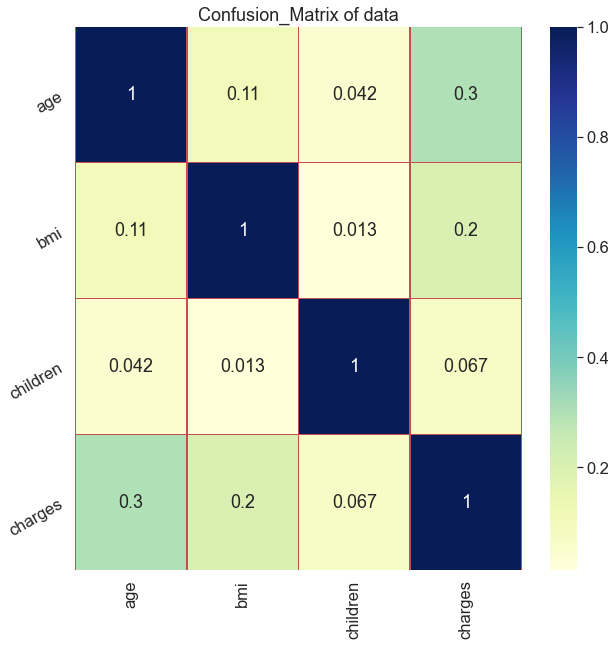

In [34]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [35]:
df.head(2)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

In [36]:
# To Present species of workclass ::
sexs = df["sex"].value_counts()
sexs

male      675
female    662
Name: sex, dtype: int64

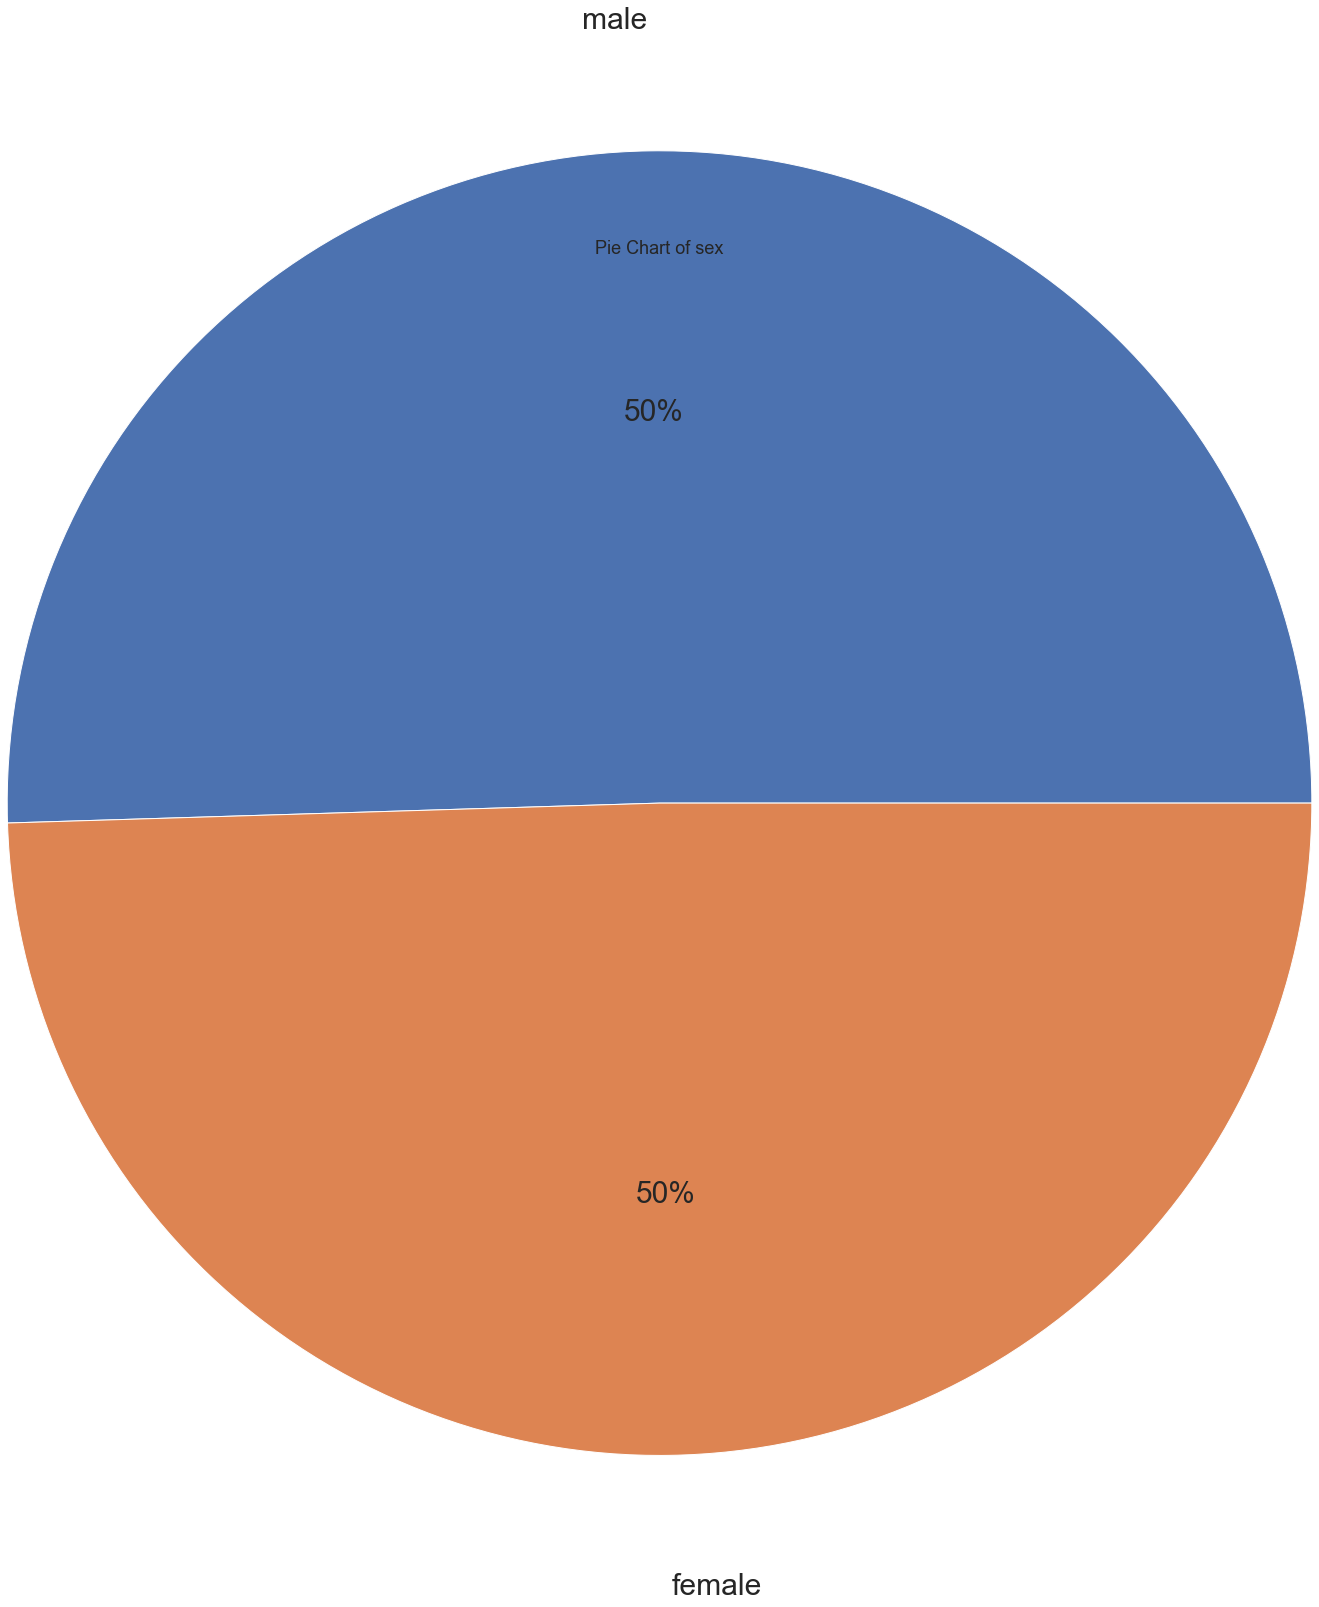

In [37]:
# Visualize Comparing sexs ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
sexs.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of sex")
plt.show()

In [38]:
# To Present species of childrens ::
childrens = df["children"].value_counts()
childrens

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Pie Chart of children')

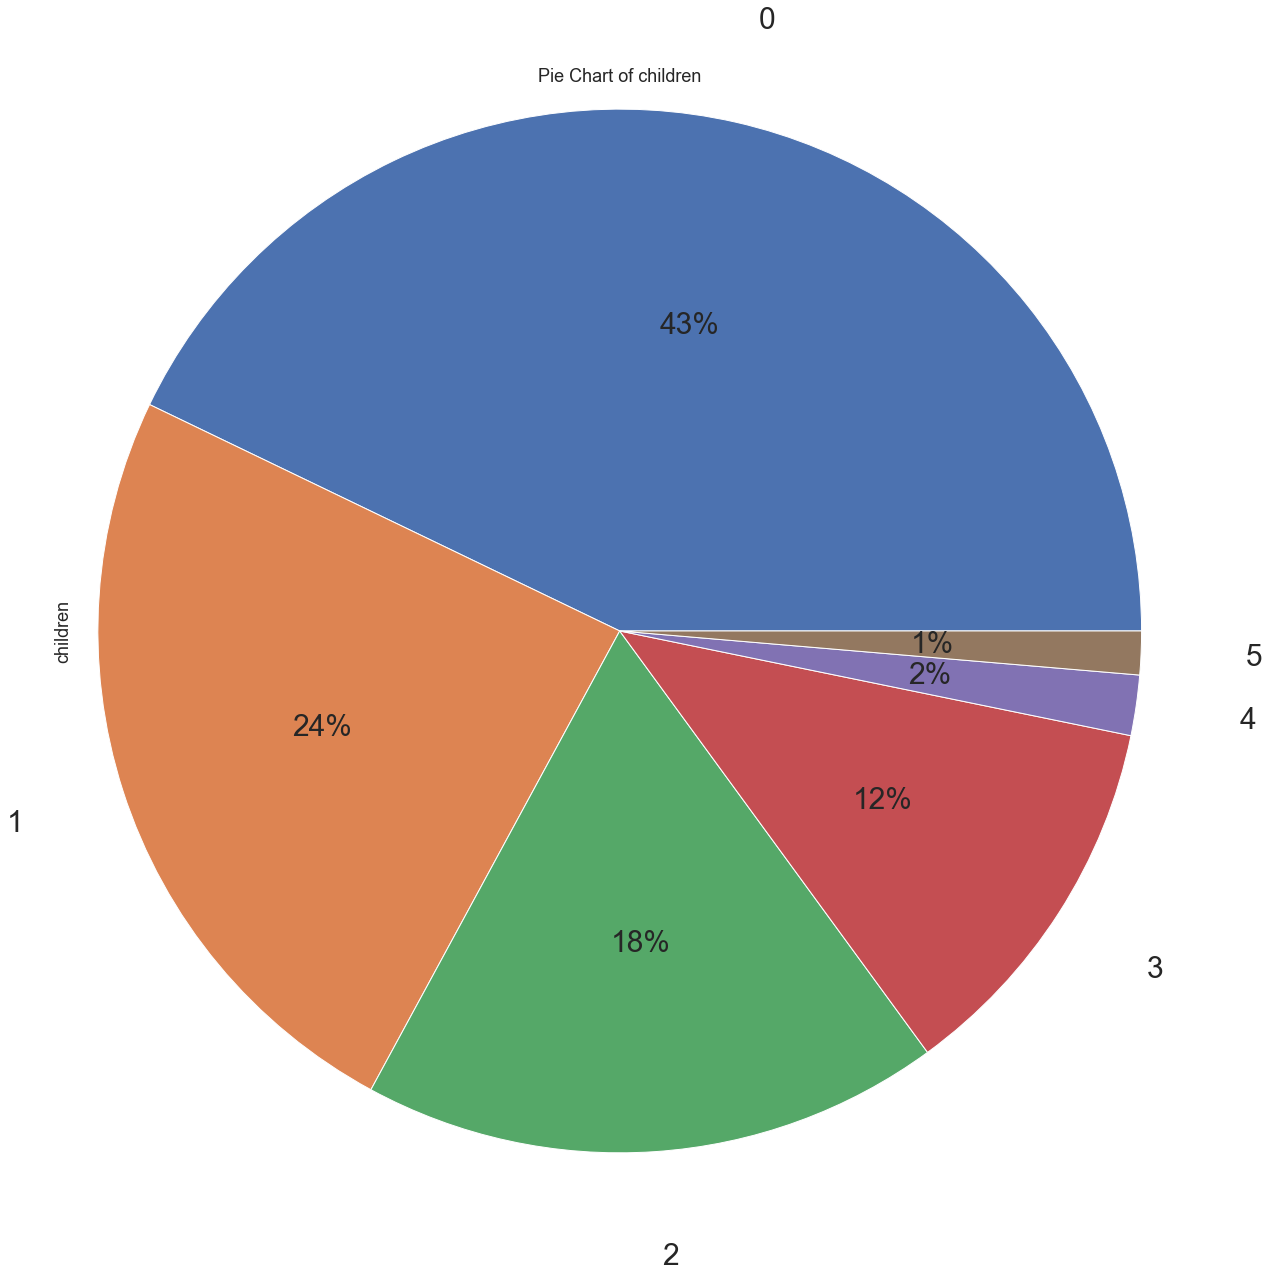

In [39]:
childrens.plot.pie(autopct = "%1.0f%%" , radius = 1.2 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of children")

In [40]:
# To Present species of smokers ::
smokers = df["smoker"].value_counts()
smokers

no     1063
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Pie Chart of smoker')

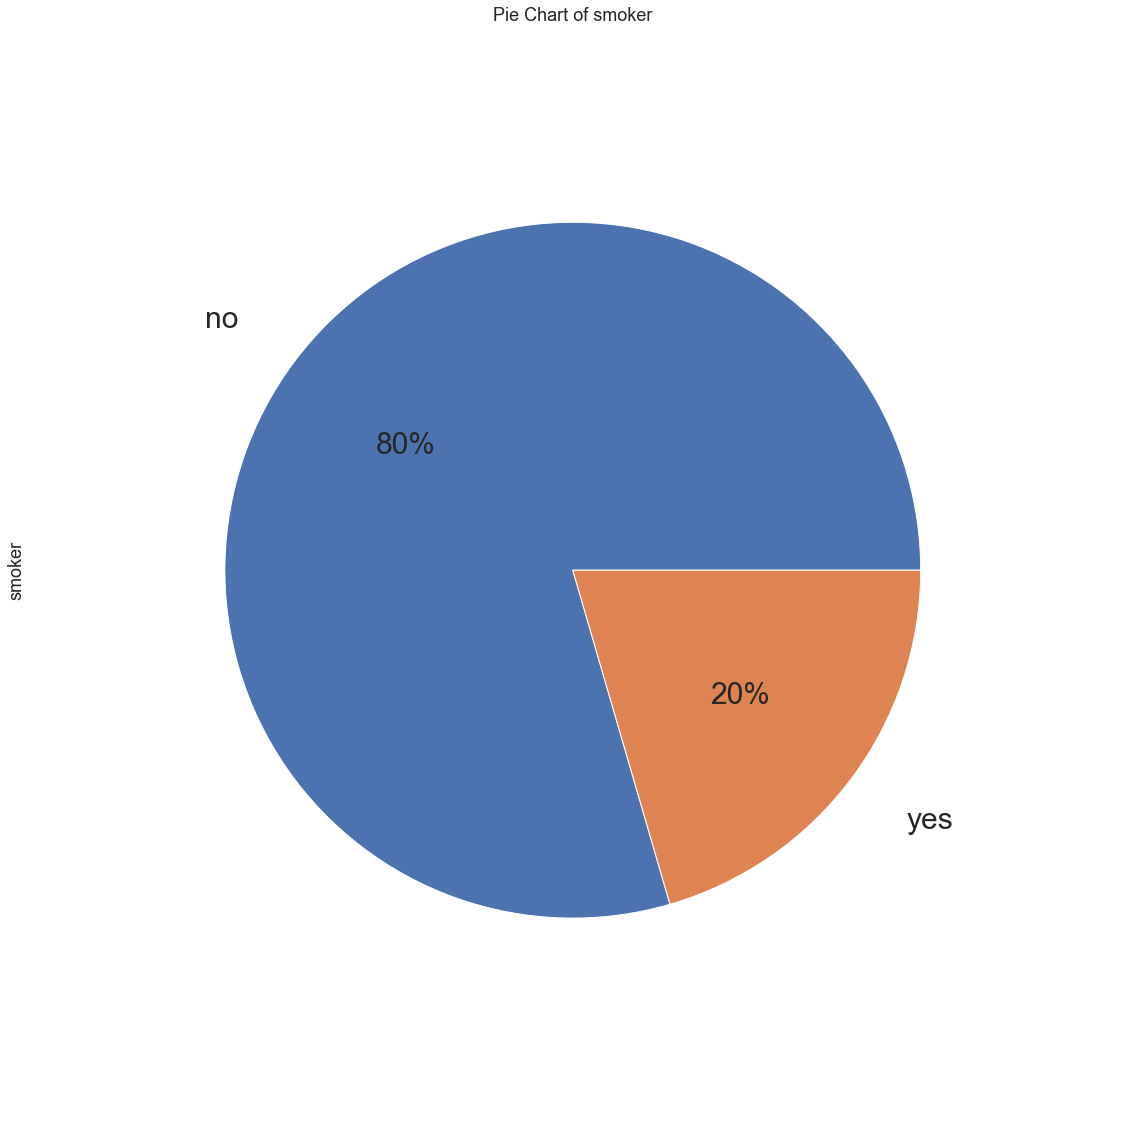

In [41]:
smokers.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of smoker")

In [42]:
# To Present species of regions ::
regions = df["region"].value_counts()
regions

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Pie Chart of region')

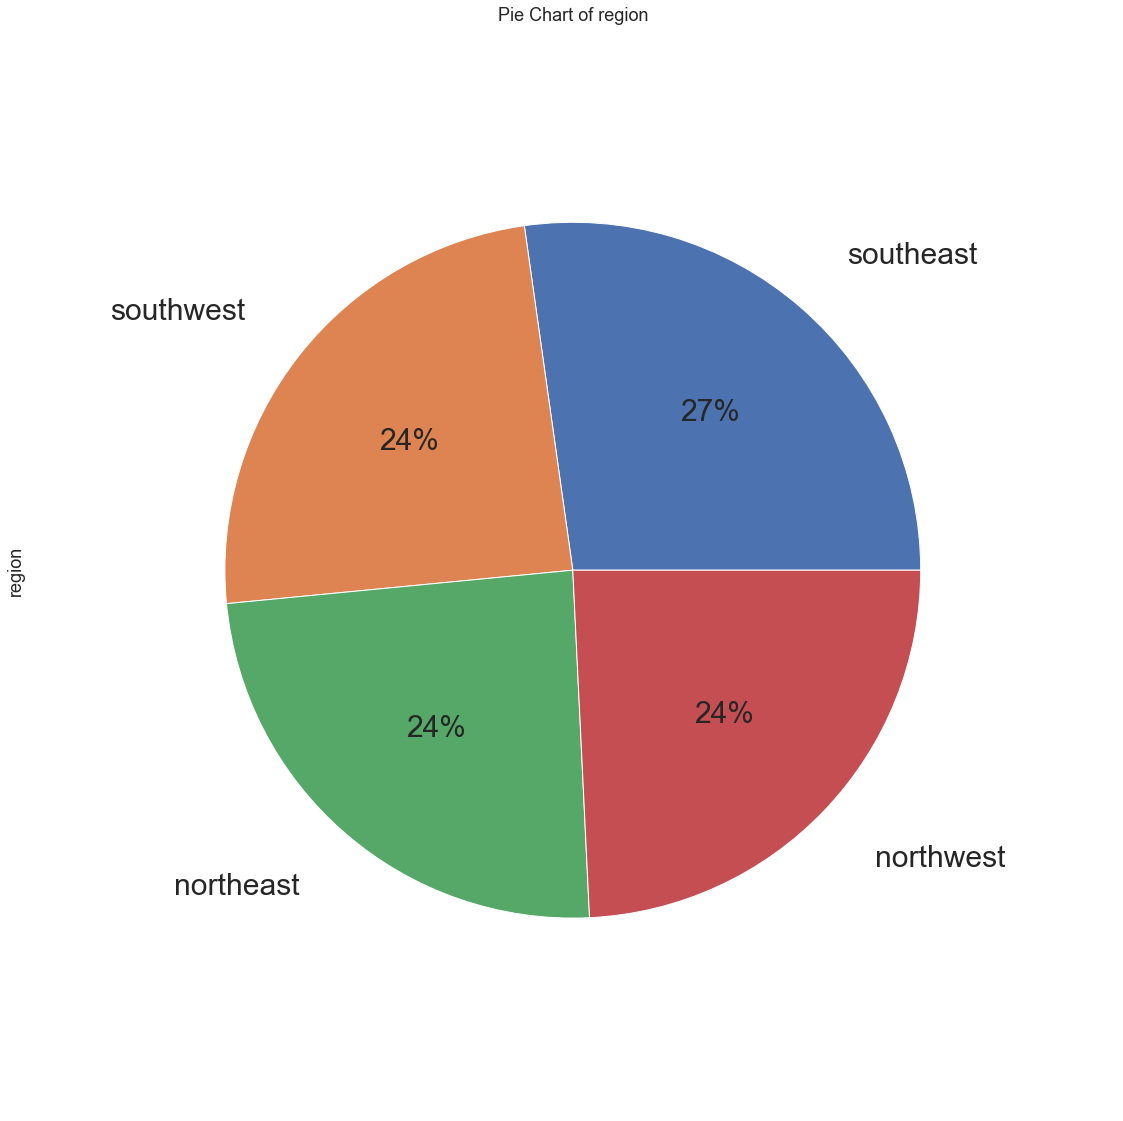

In [43]:
regions.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of region")

In [44]:
df.head(2)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

Text(0.5, 1.0, 'Distribution Plot of age')

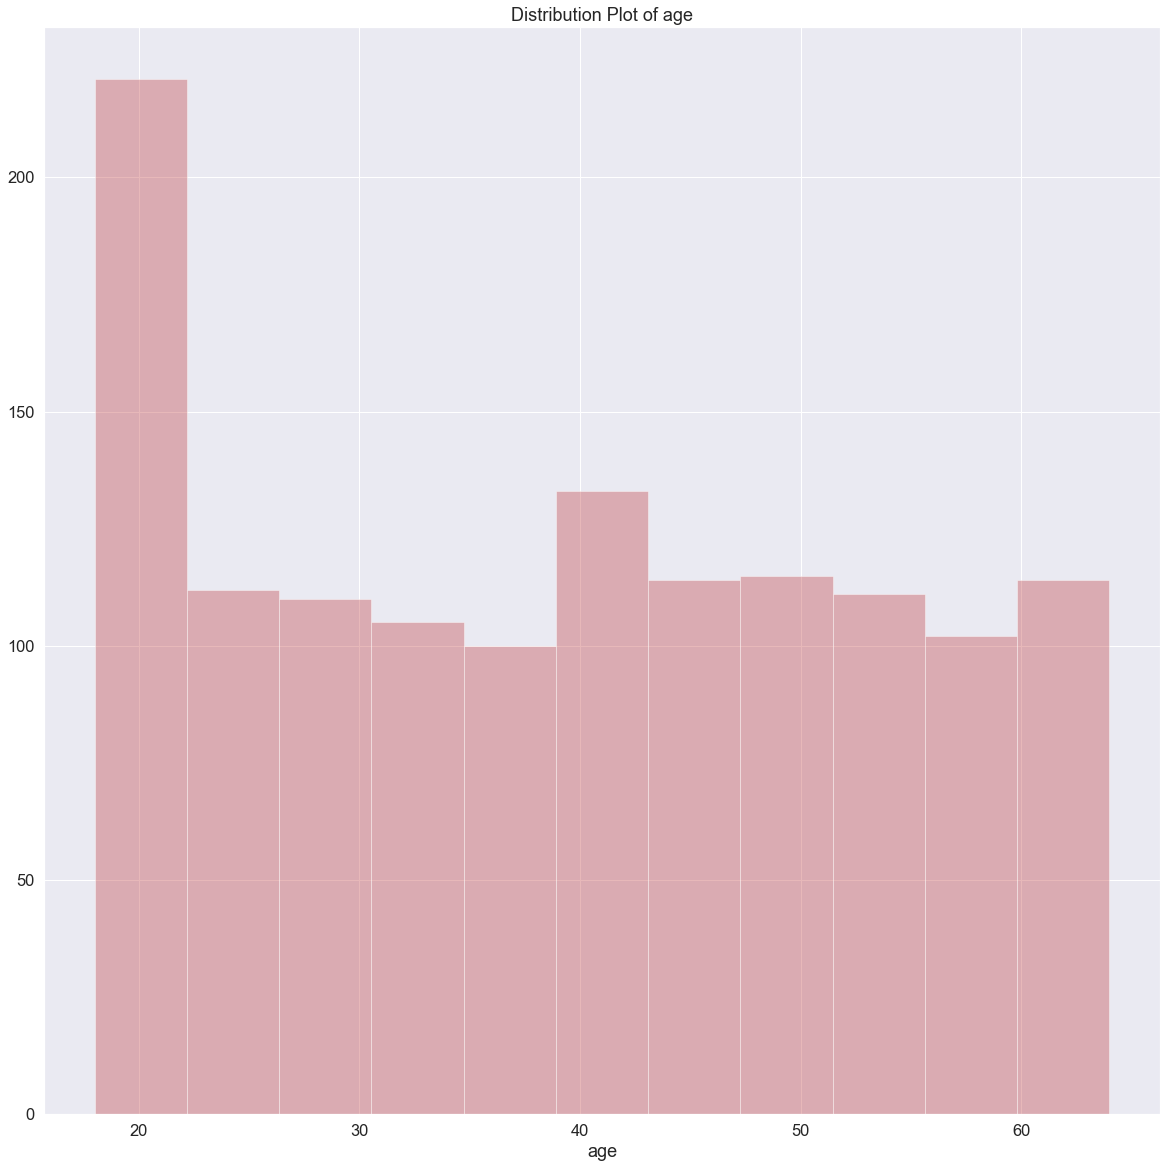

In [45]:
sns.distplot(df["age"] , kde=False , color="r")
plt.title("Distribution Plot of age")

Text(0.5, 1.0, 'Kde Plot of age')

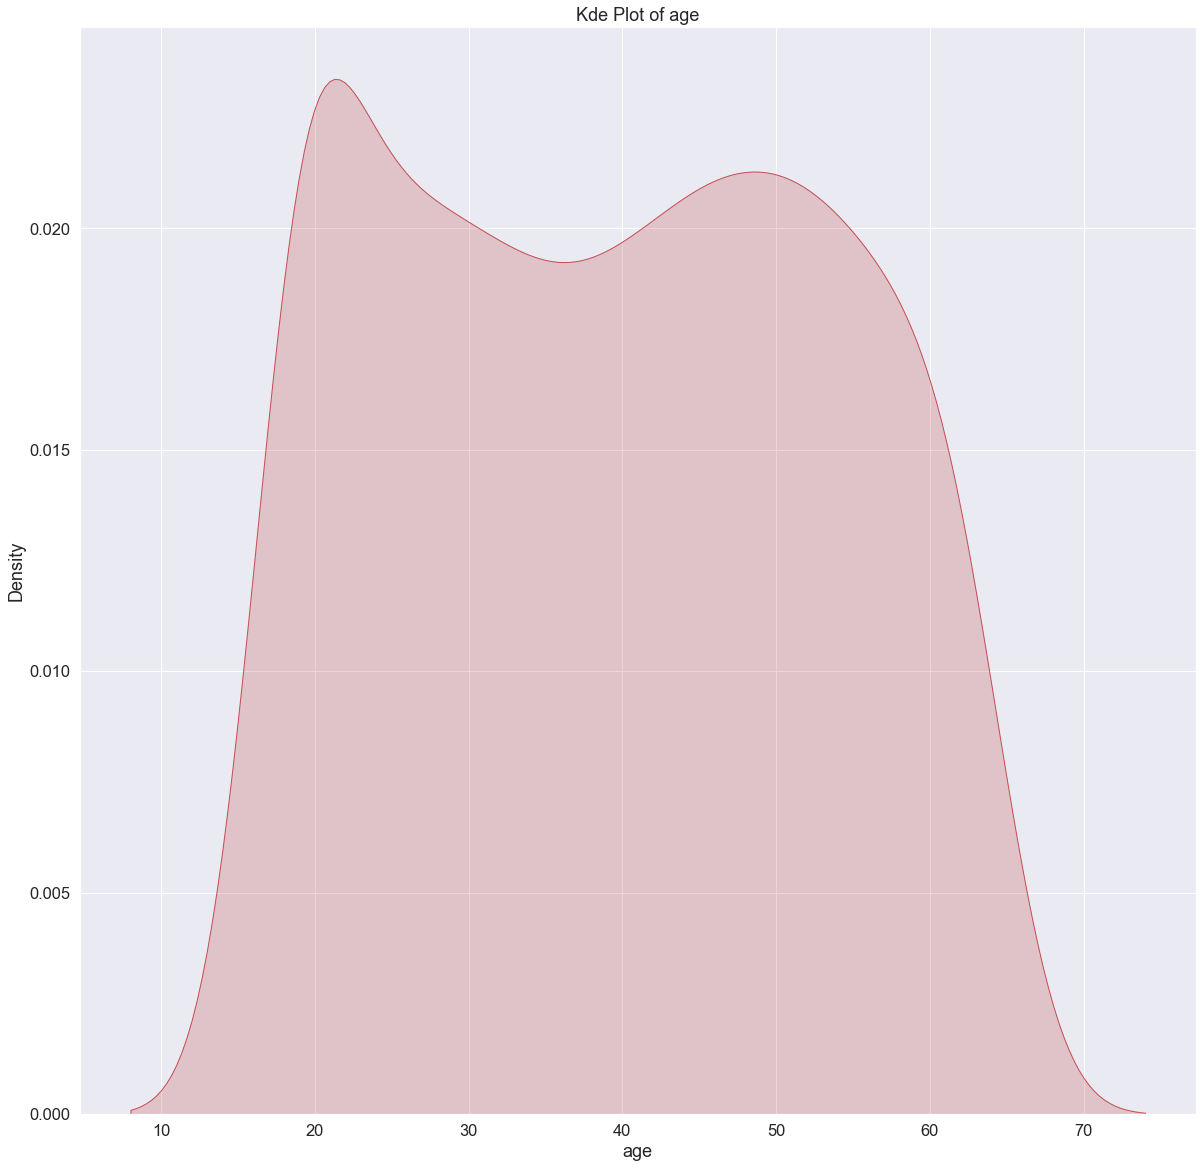

In [46]:
sns.kdeplot(df["age"] , shade=True , color="r")
plt.title("Kde Plot of age")

Text(0.5, 1.0, 'Distribution Plot of bmi')

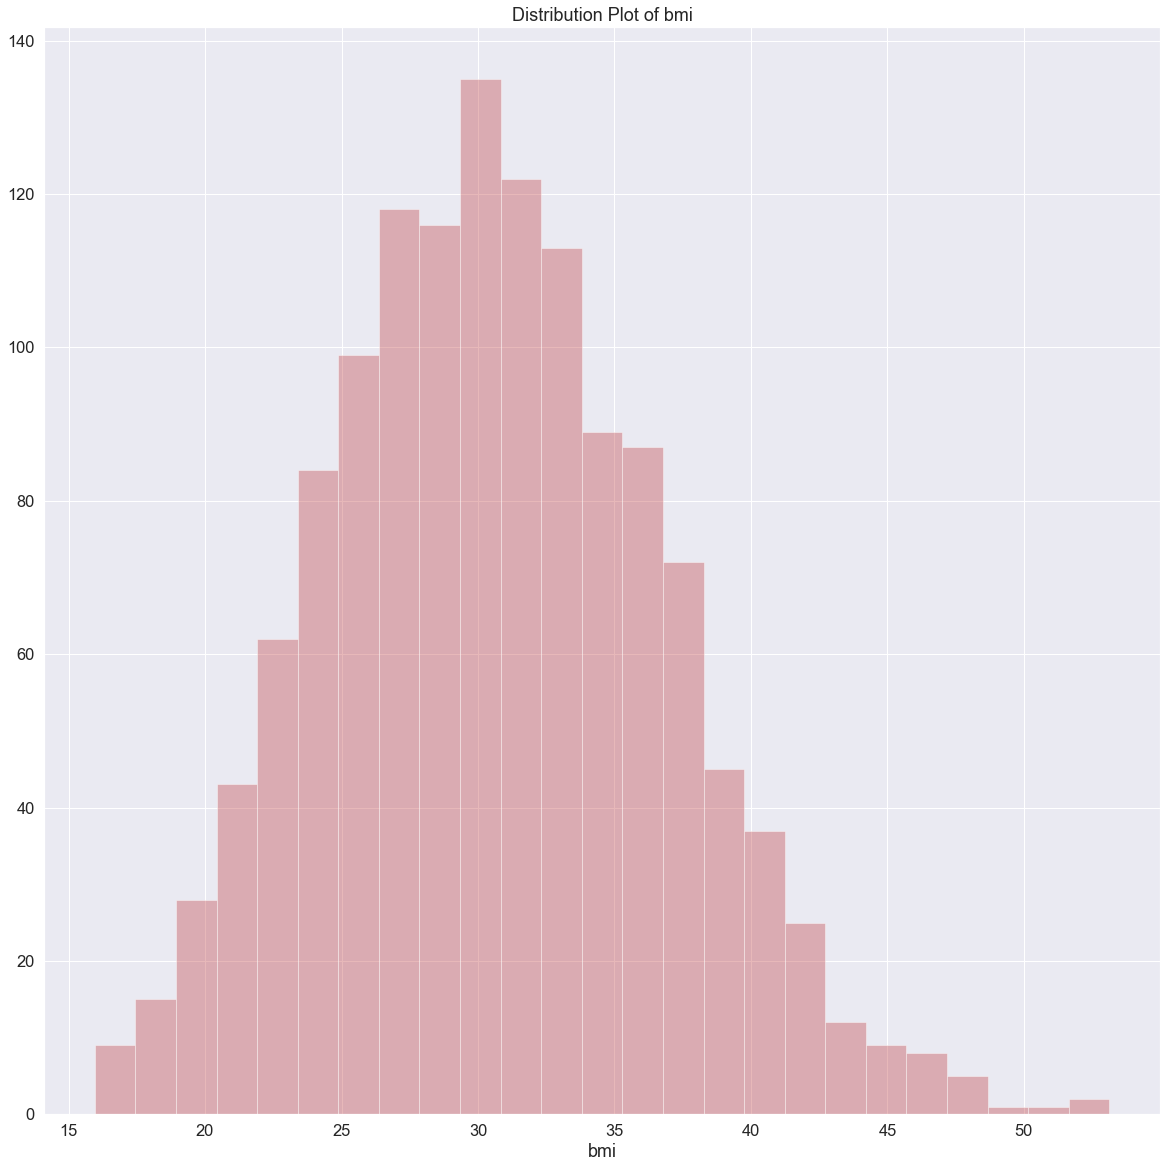

In [47]:
sns.distplot(df["bmi"] , kde=False , color="r")
plt.title("Distribution Plot of bmi")

Text(0.5, 1.0, 'Kde Plot of bmi')

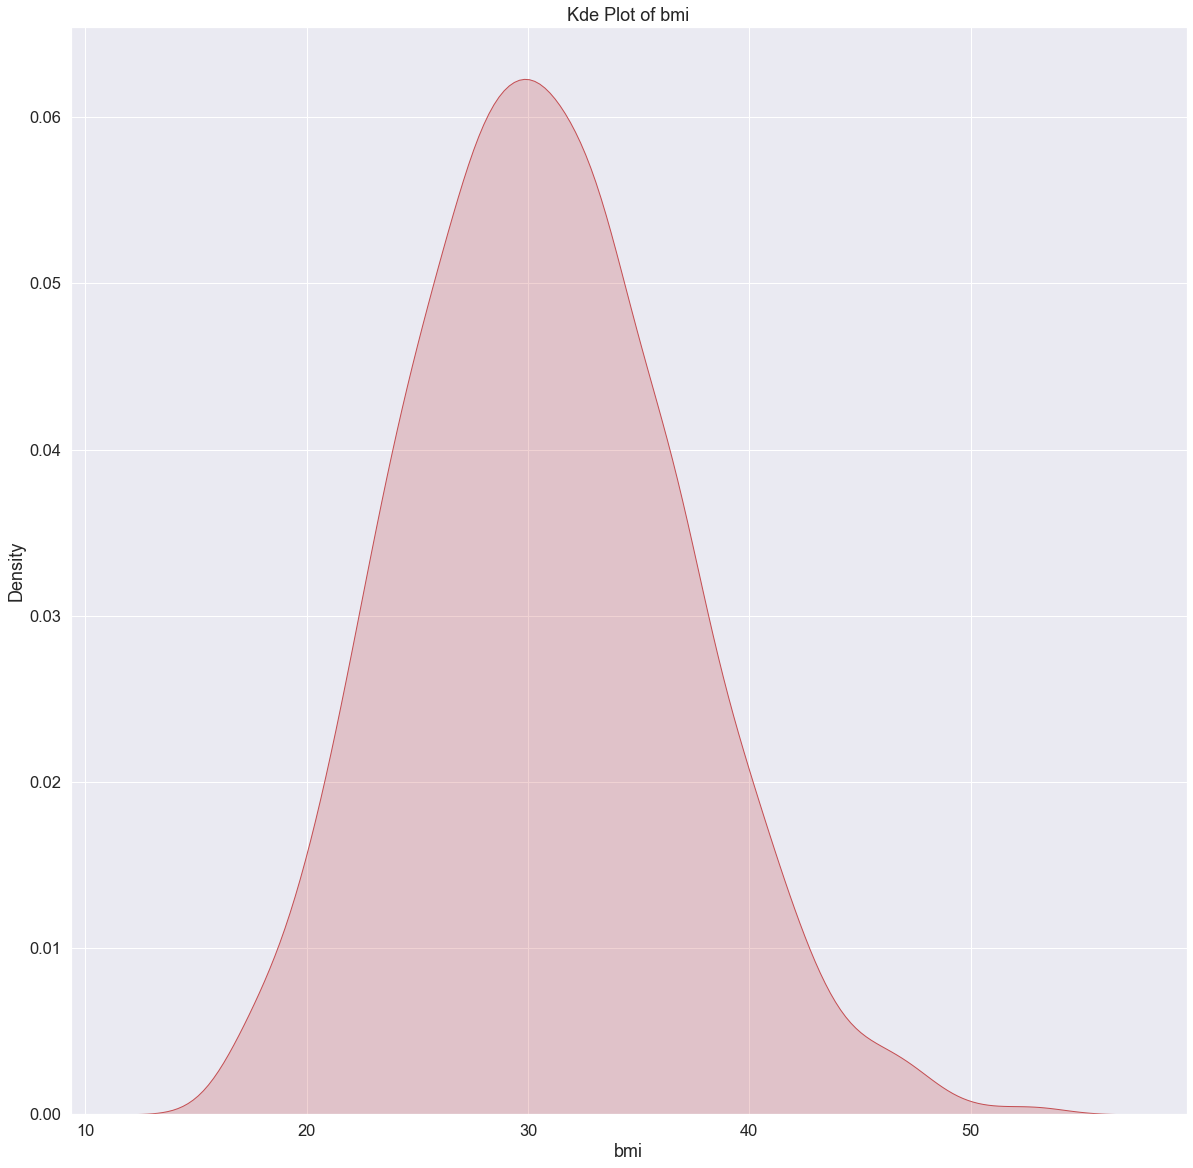

In [48]:
sns.kdeplot(df["bmi"] , shade=True , color="r")
plt.title("Kde Plot of bmi")

Text(0.5, 1.0, 'Distribution Plot of children')

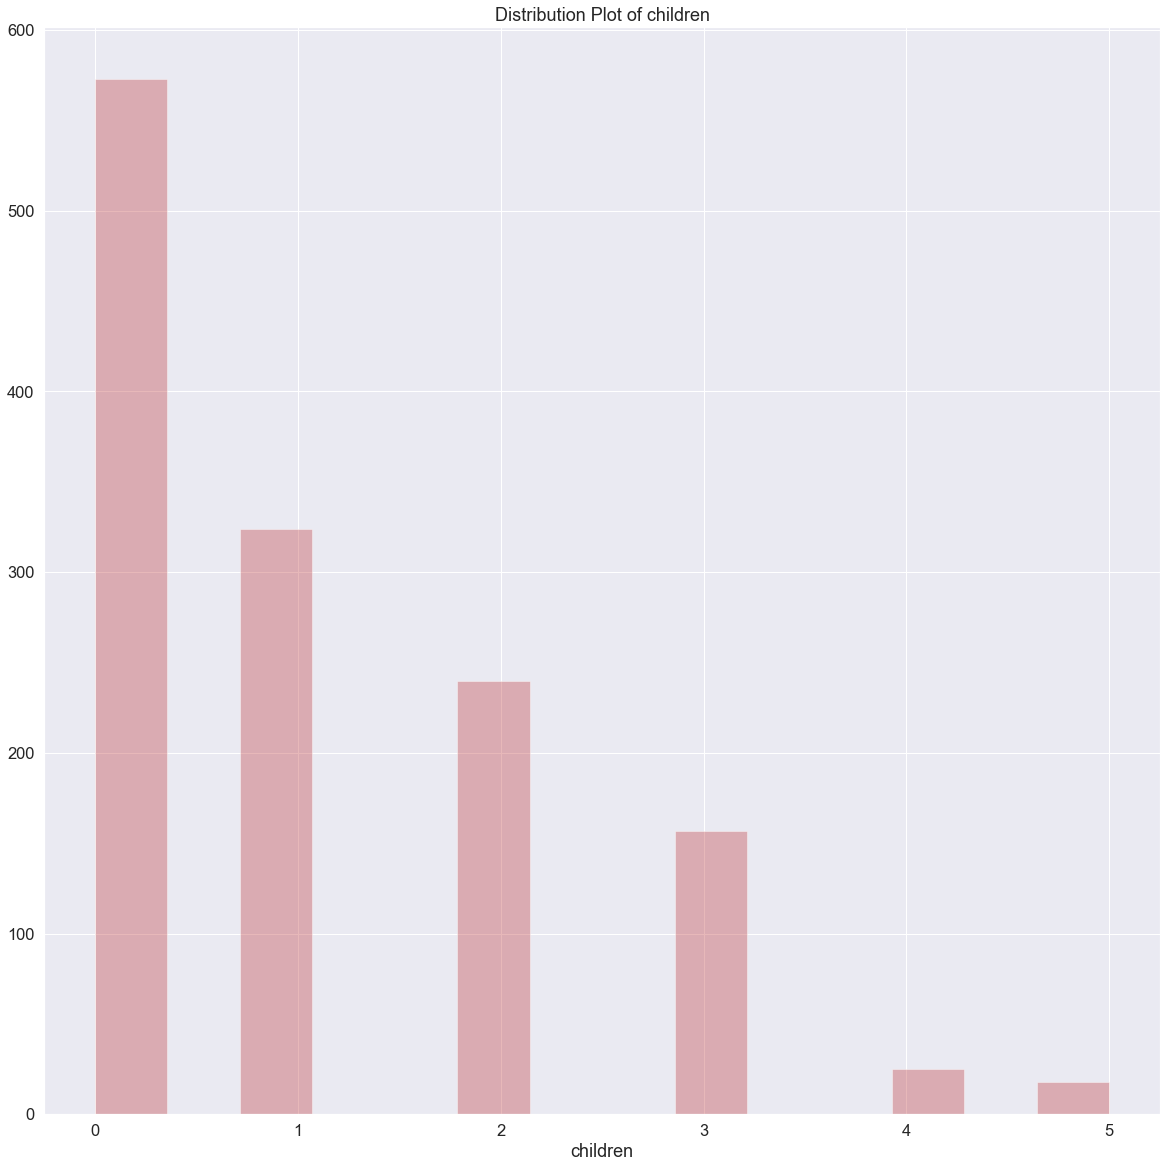

In [49]:
sns.distplot(df["children"] , kde=False , color="r")
plt.title("Distribution Plot of children")

Text(0.5, 1.0, 'Kde Plot of children')

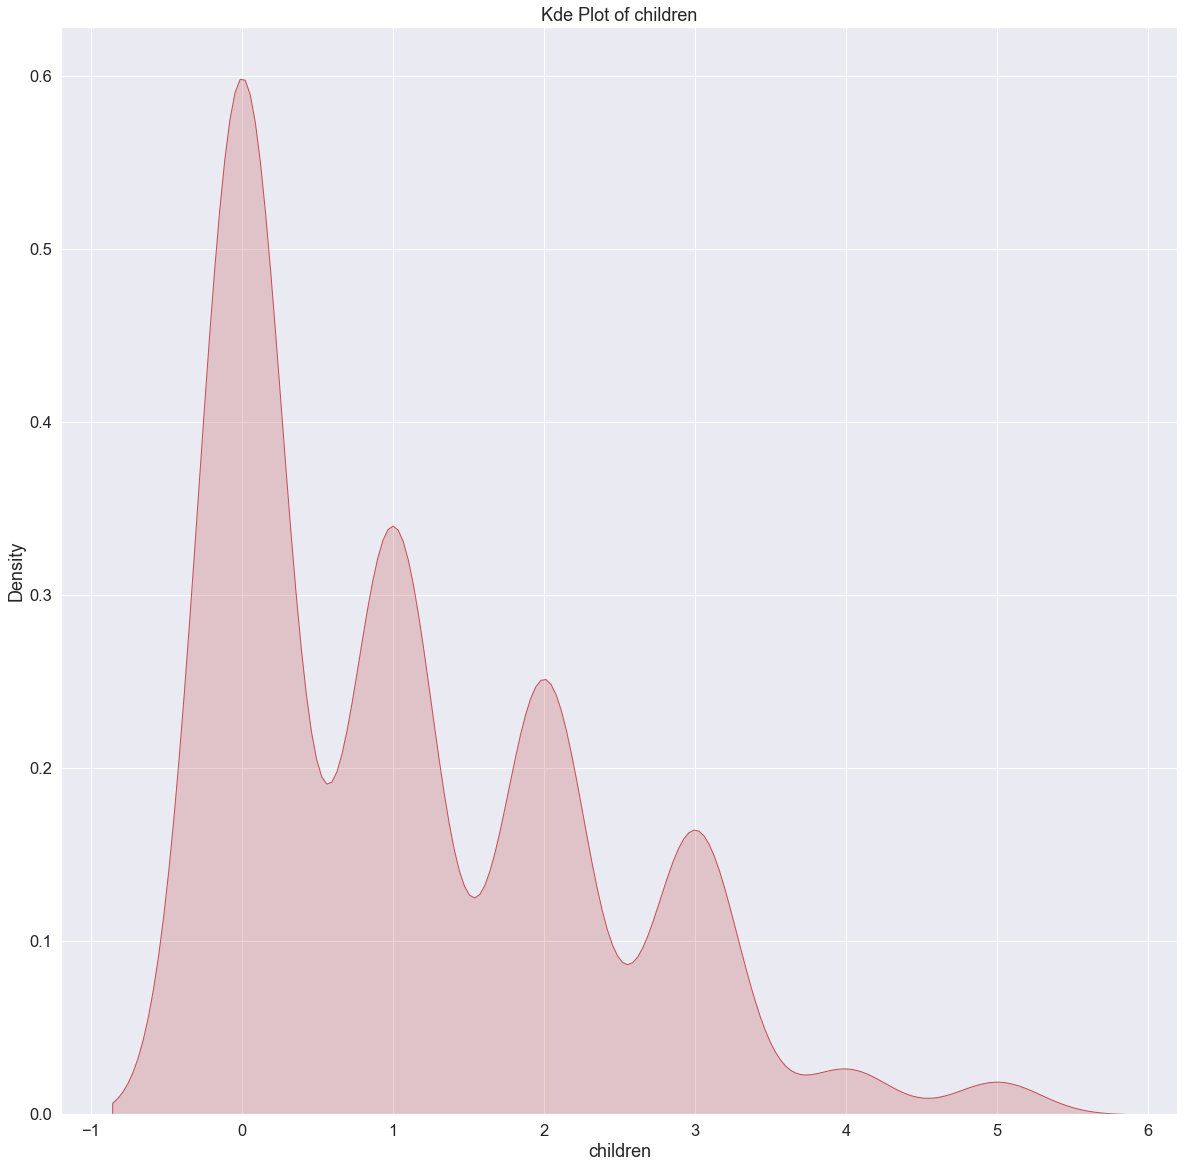

In [50]:
sns.kdeplot(df["children"] , shade=True , color="r")
plt.title("Kde Plot of children")

Text(0.5, 1.0, 'Distribution Plot of charges')

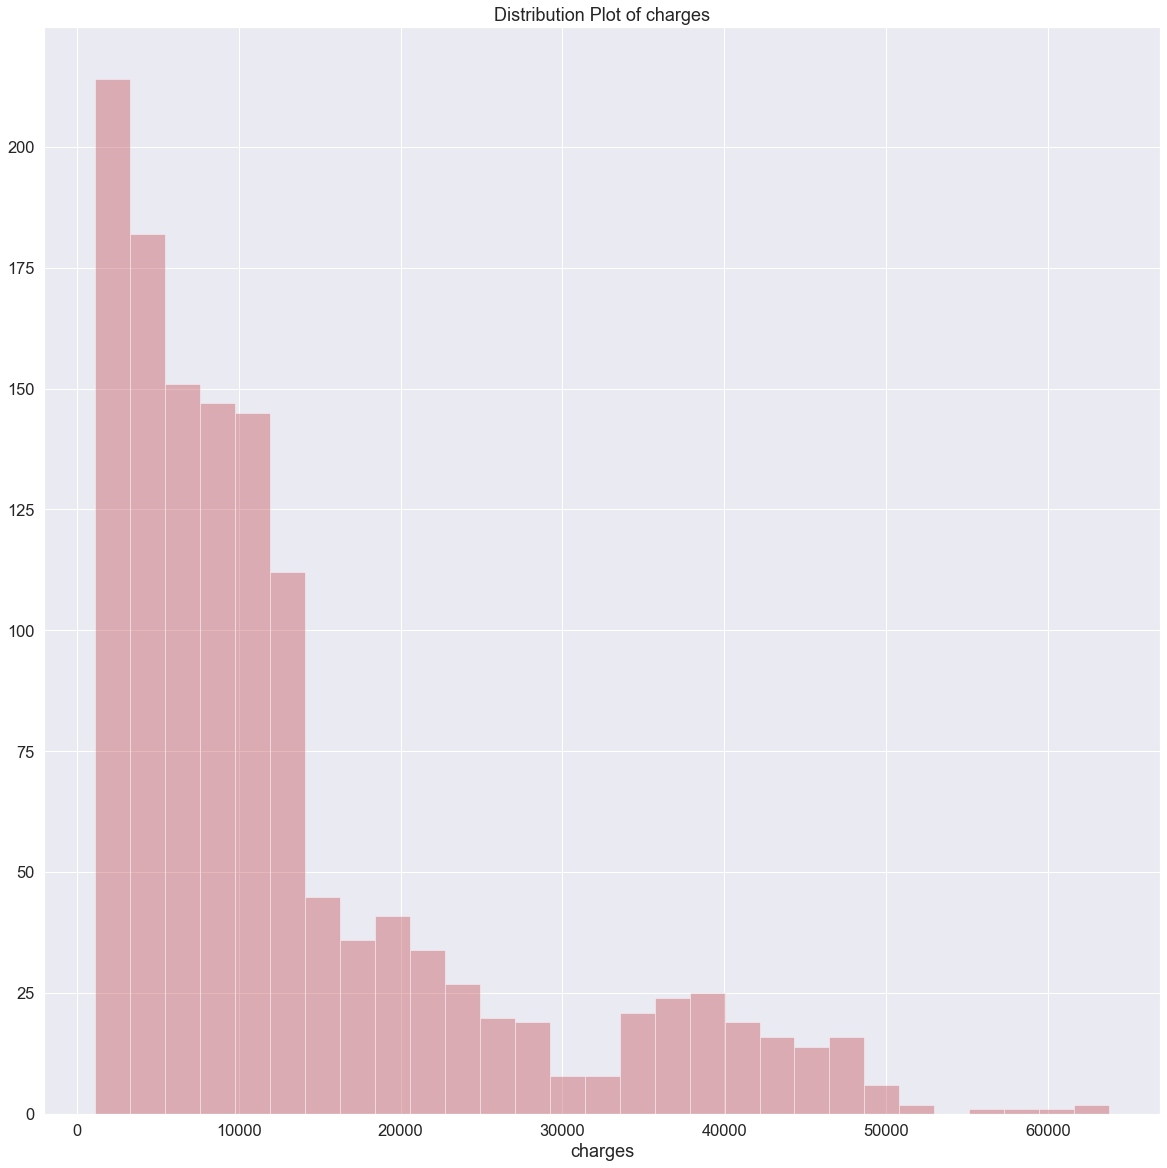

In [51]:
sns.distplot(df["charges"] , kde=False , color="r")
plt.title("Distribution Plot of charges")

Text(0.5, 1.0, 'Kde Plot of charges')

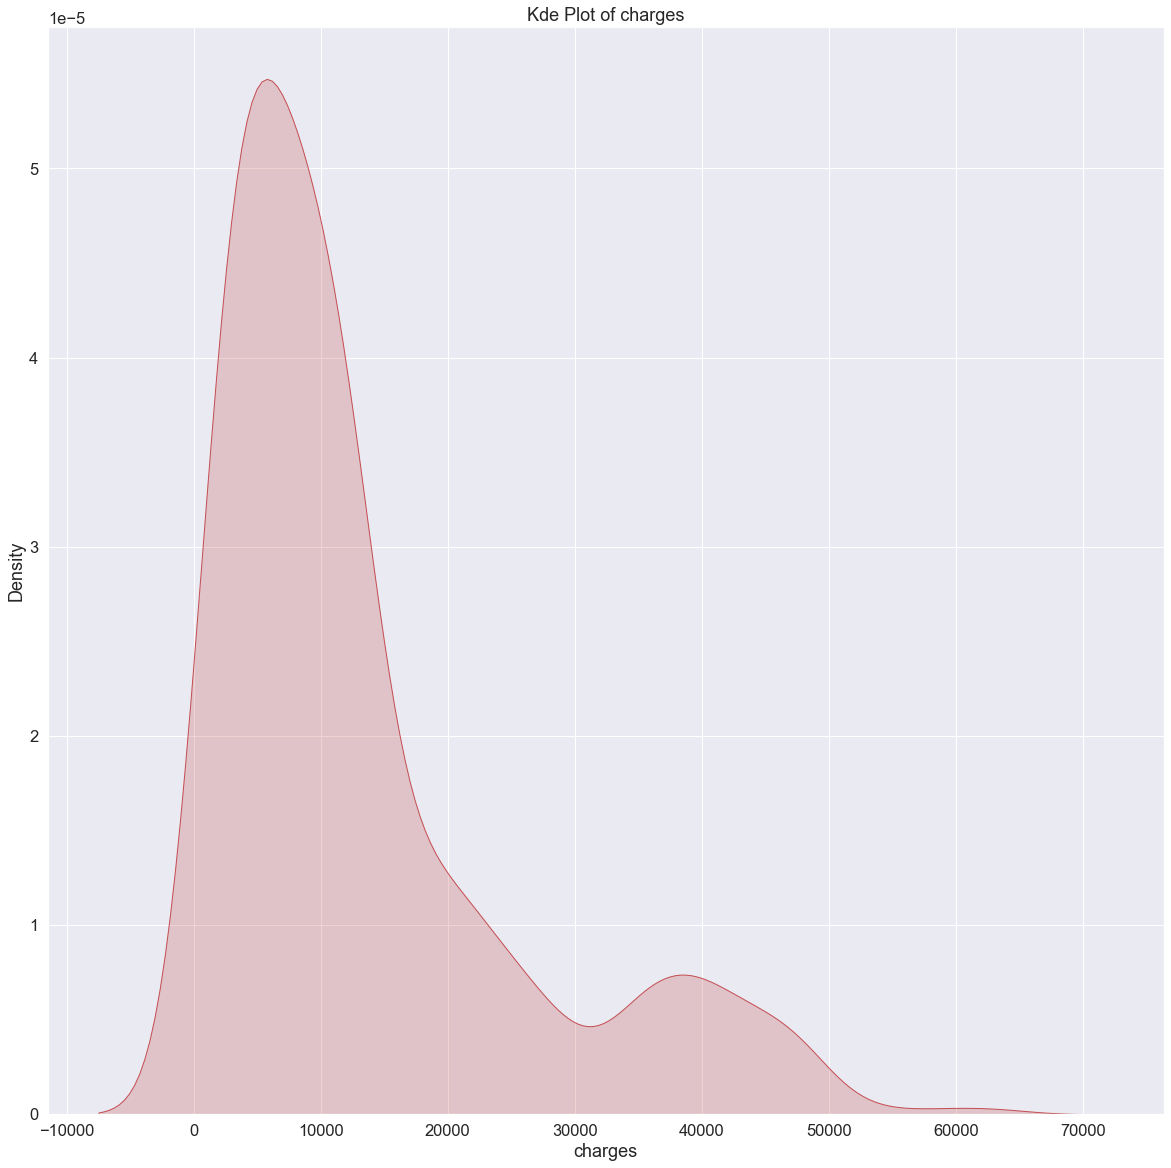

In [52]:
sns.kdeplot(df["charges"] , shade=True , color="r")
plt.title("Kde Plot of charges")

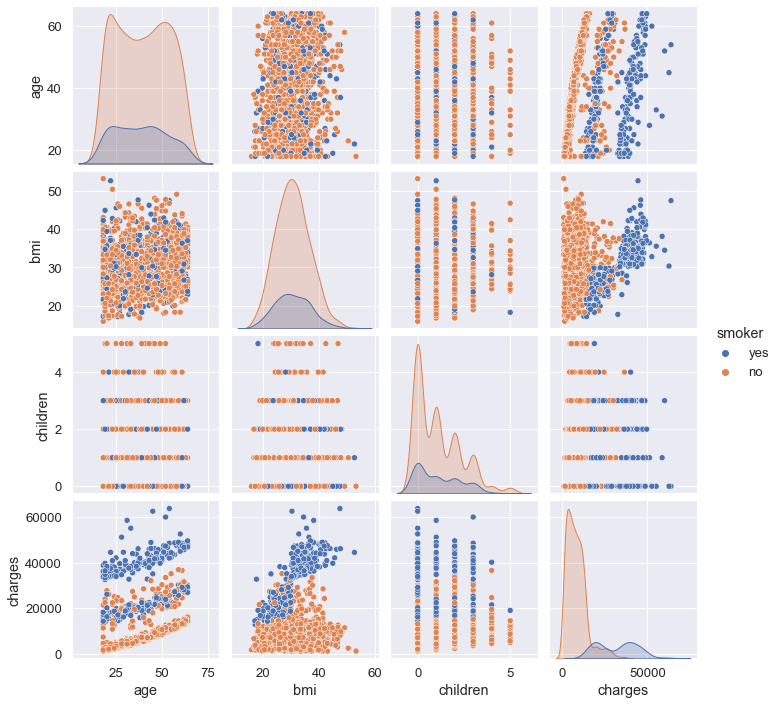

In [53]:
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=1.2)
sns.pairplot(df , hue = "smoker"  )

Text(0.5, 1.0, 'Smokers and non-smokers')

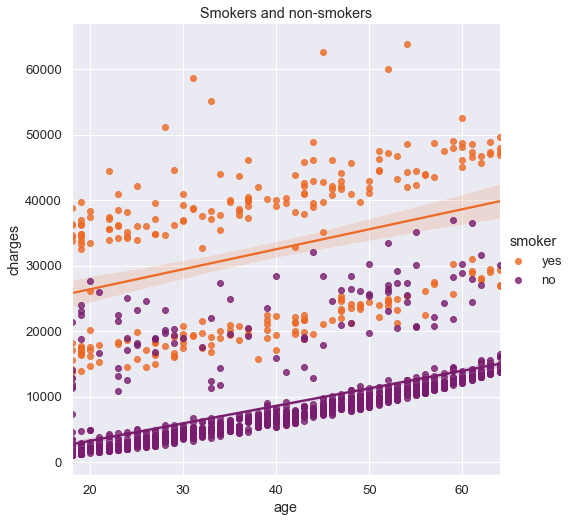

In [54]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r', size = 7)
plt.title('Smokers and non-smokers')

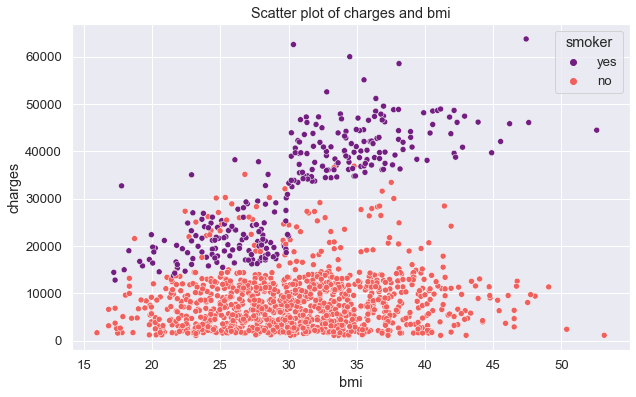

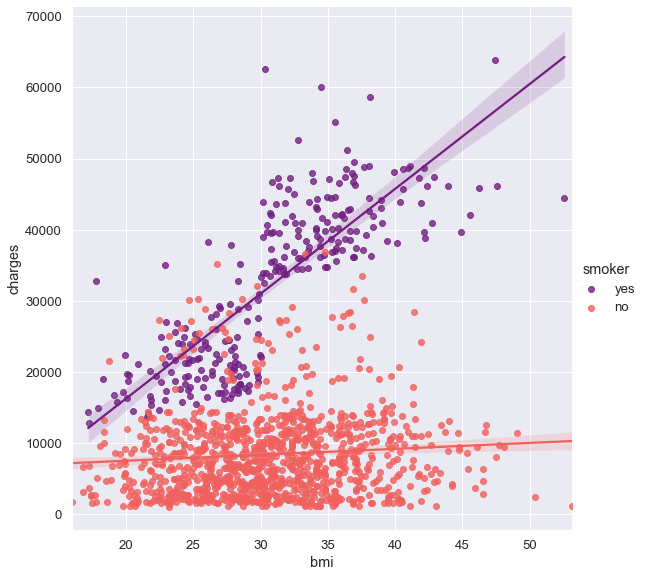

In [55]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)

In [56]:
df.head(2)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

Text(0.5, 1.0, 'Swarm Plot of age and charges Based on smoker ')

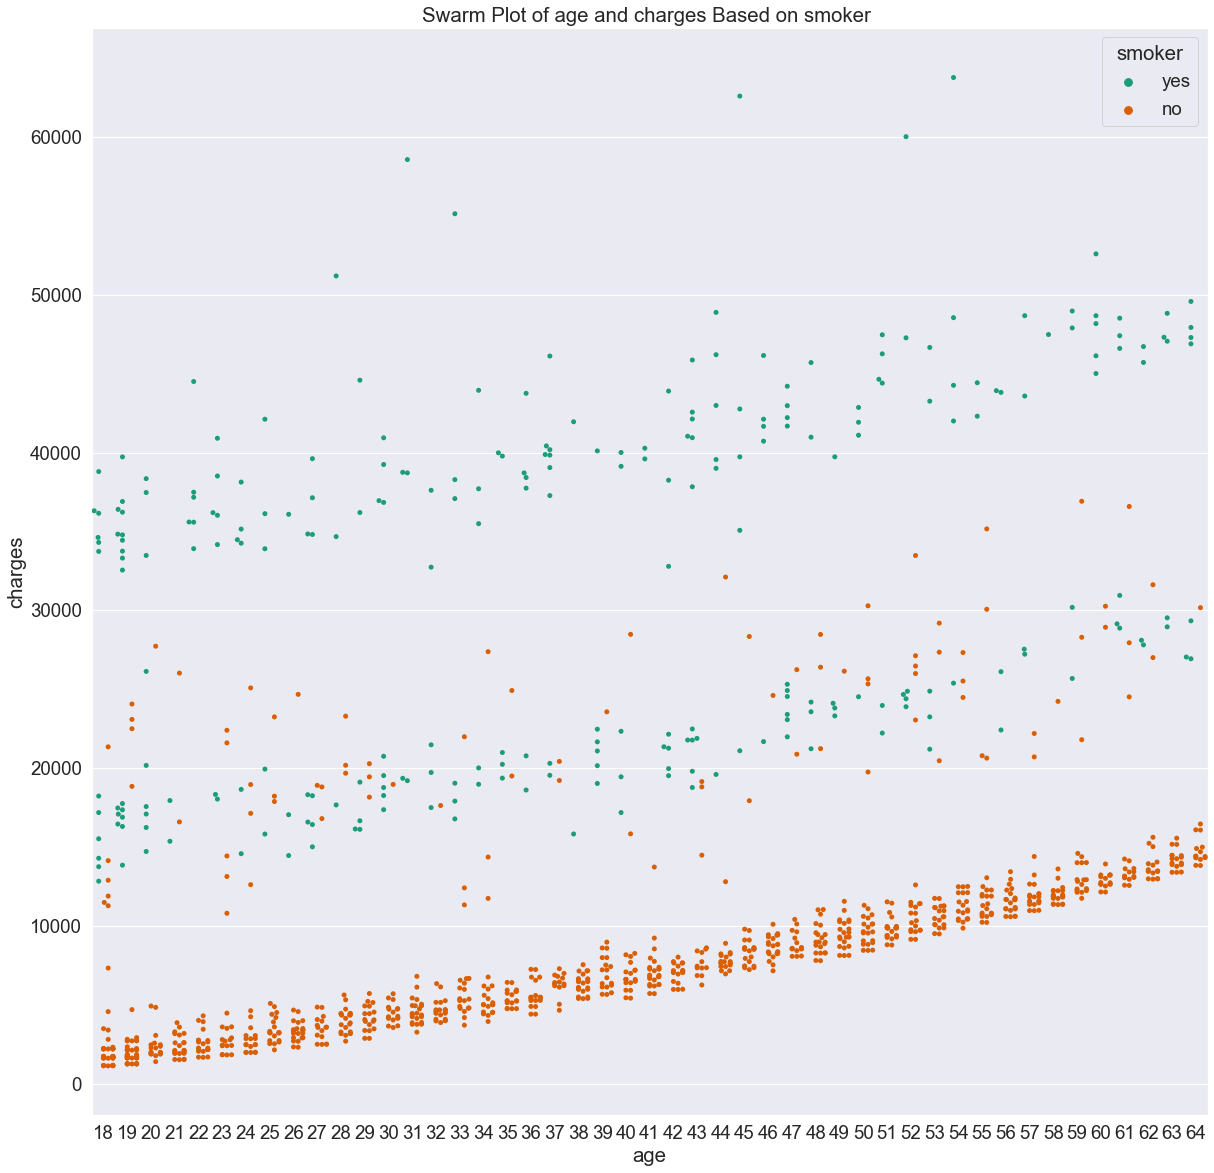

In [57]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "age" , y = "charges" , data = df ,hue = "smoker" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of age and charges Based on smoker ")

Text(0.5, 1.0, 'Swarm Plot of children and charges Based on smoker ')

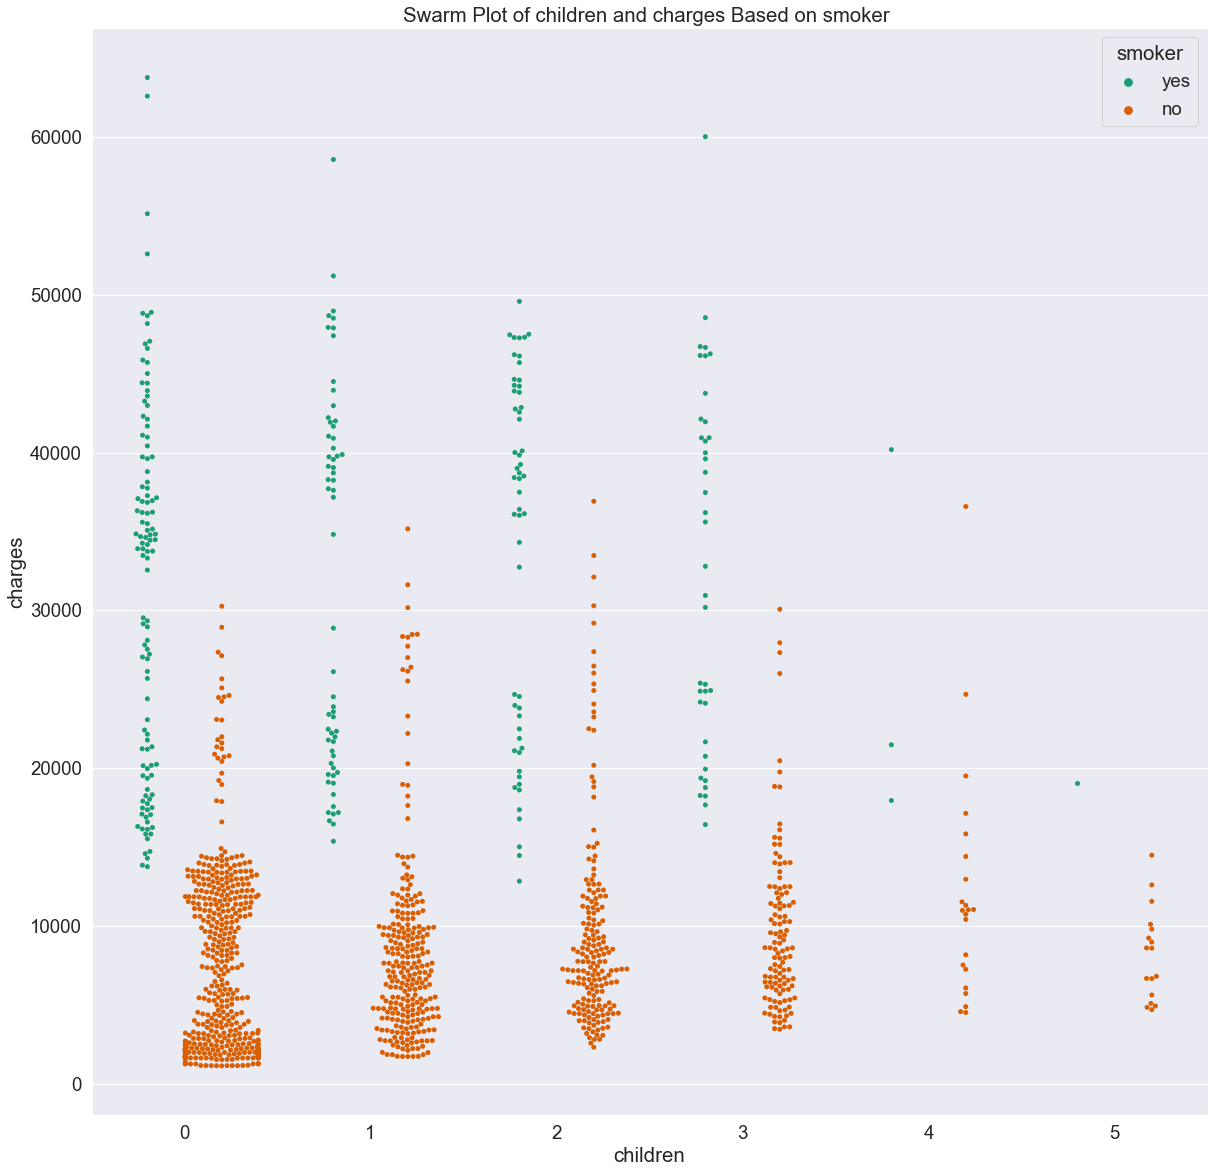

In [58]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "children" , y = "charges" , data = df ,hue = "smoker" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of children and charges Based on smoker ")

Text(0.5, 1.0, 'Swarm Plot of sex and charges Based on smoker ')

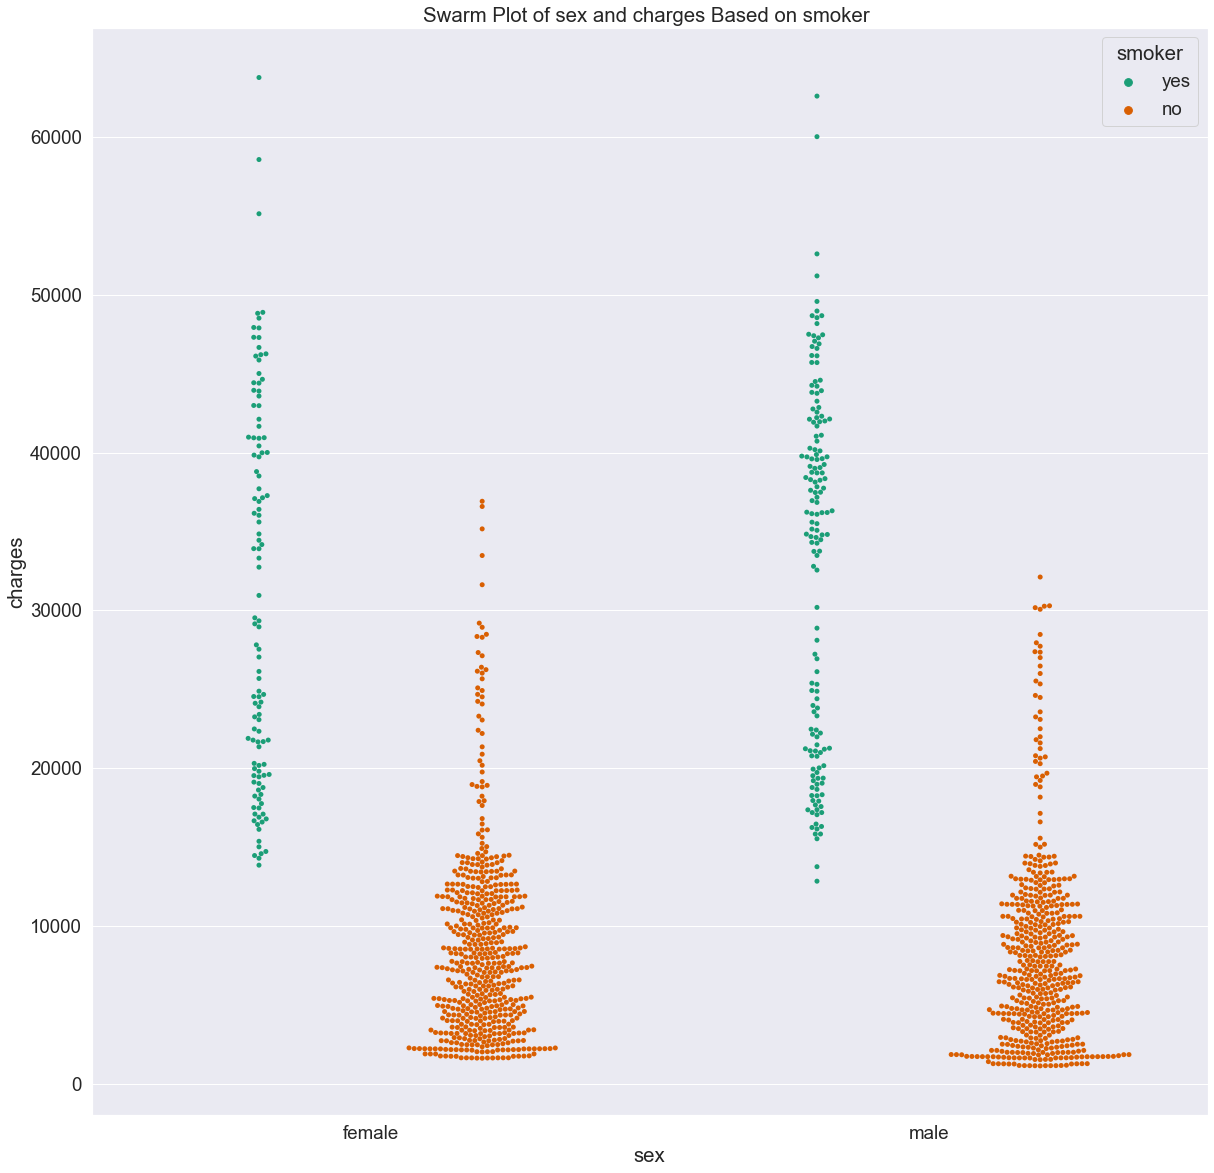

In [59]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "sex" , y = "charges" , data = df ,hue = "smoker" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of sex and charges Based on smoker ")

Text(0.5, 1.0, 'Swarm Plot of age and bmi Based on smoker ')

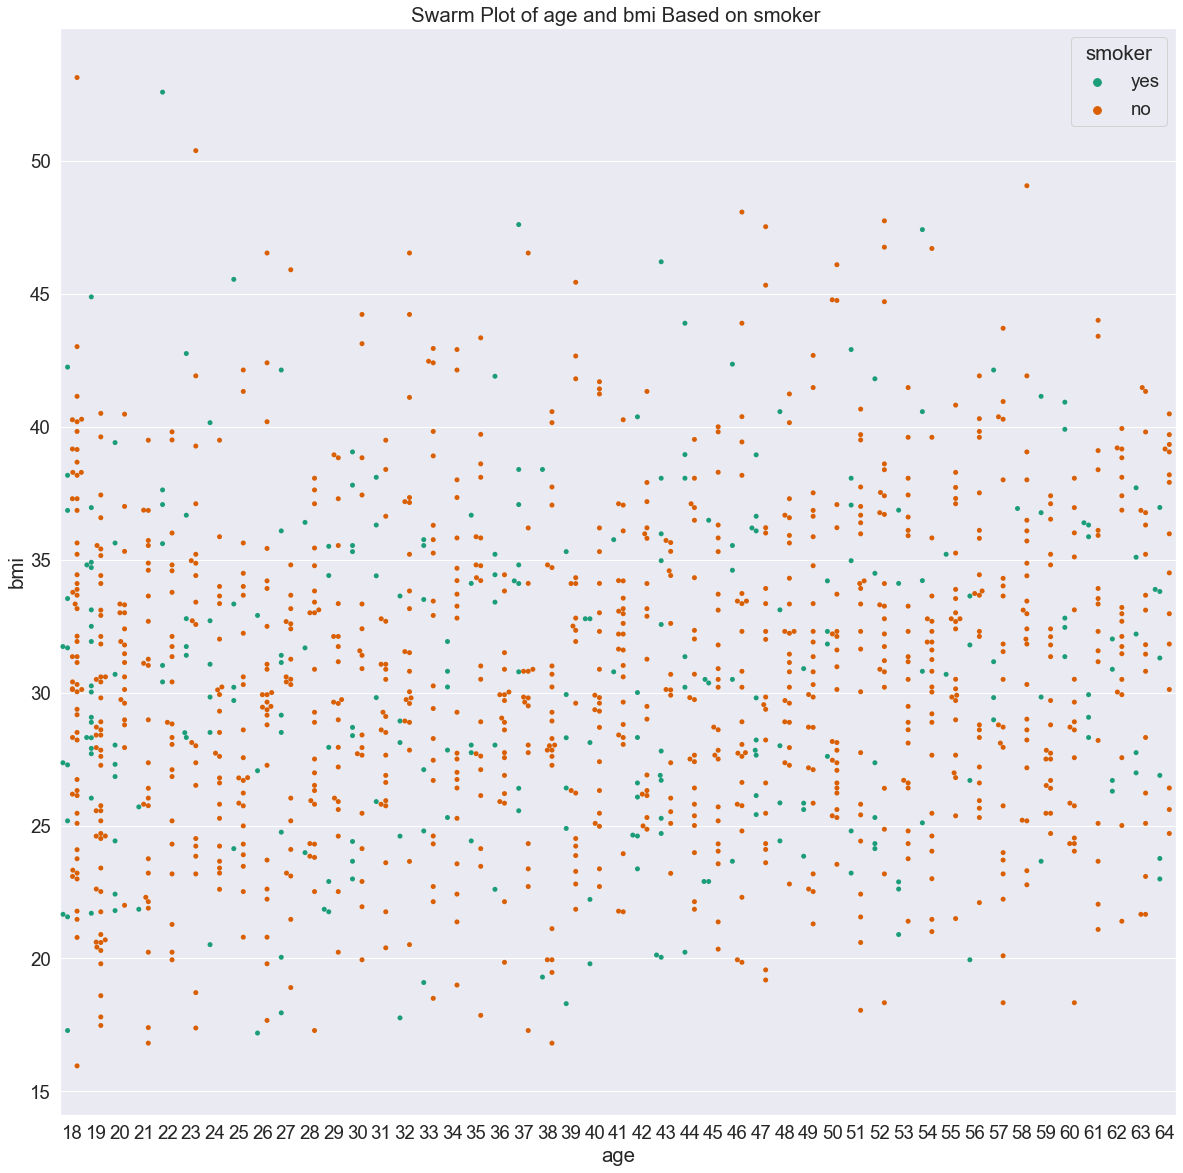

In [60]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "age" , y = "bmi" , data = df ,hue = "smoker" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of age and bmi Based on smoker ")

Text(0.5, 1.0, 'Swarm Plot of age and bmi Based on smoker ')

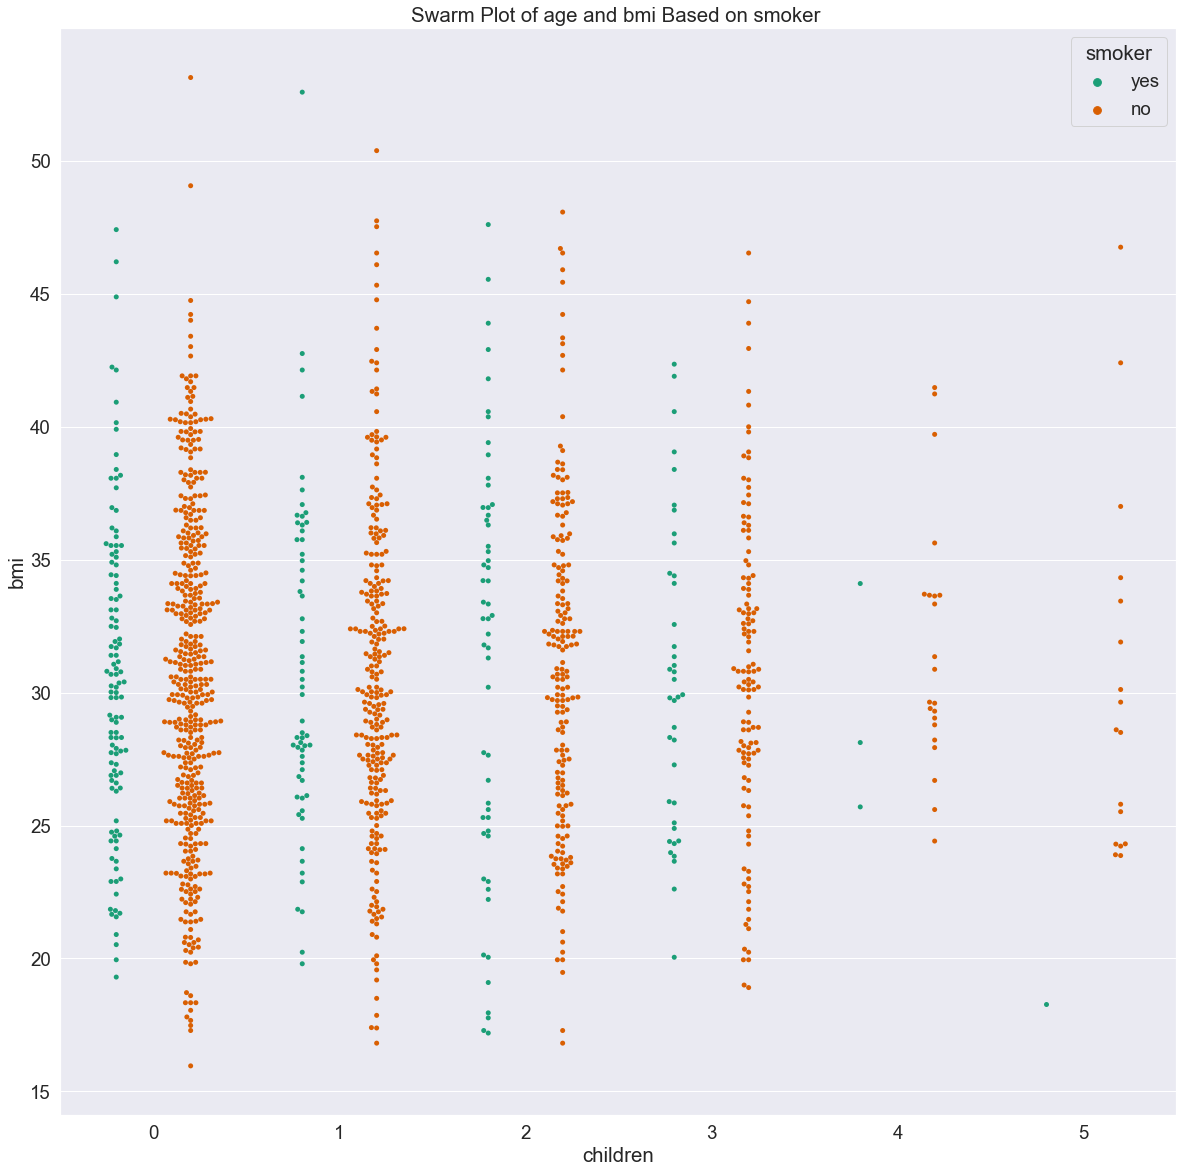

In [61]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "children" , y = "bmi" , data = df ,hue = "smoker" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of age and bmi Based on smoker ")

Text(0.5, 1.0, 'Swarm Plot of age and bmi Based on smoker ')

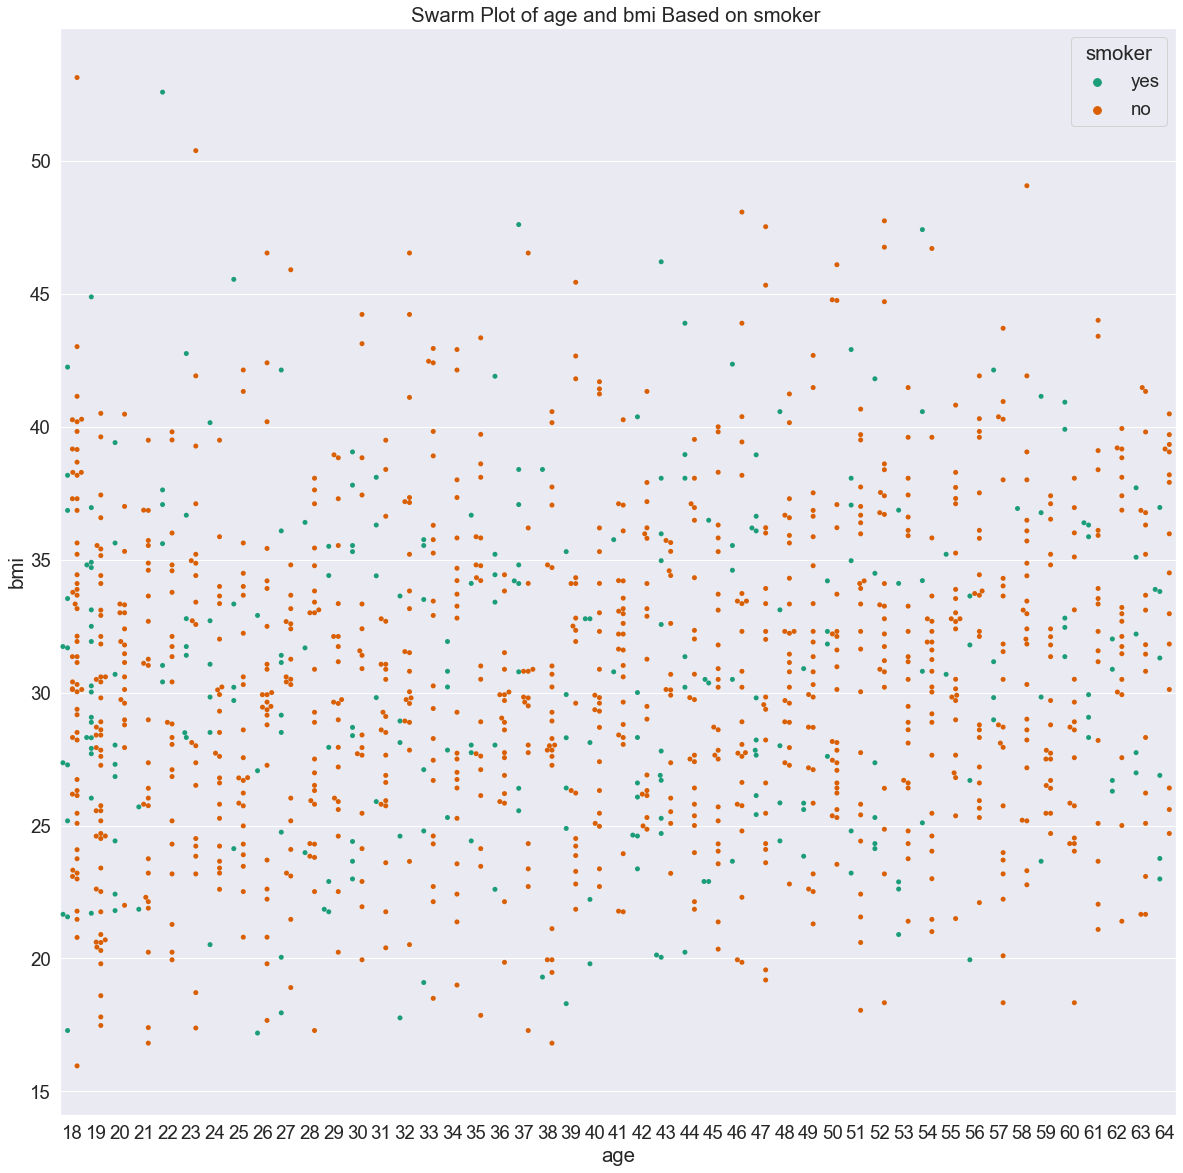

In [62]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "age" , y = "bmi" , data = df ,hue = "smoker" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of age and bmi Based on smoker ")

Text(0.5, 1.0, 'Swarm Plot of sex and bmi Based on smoker ')

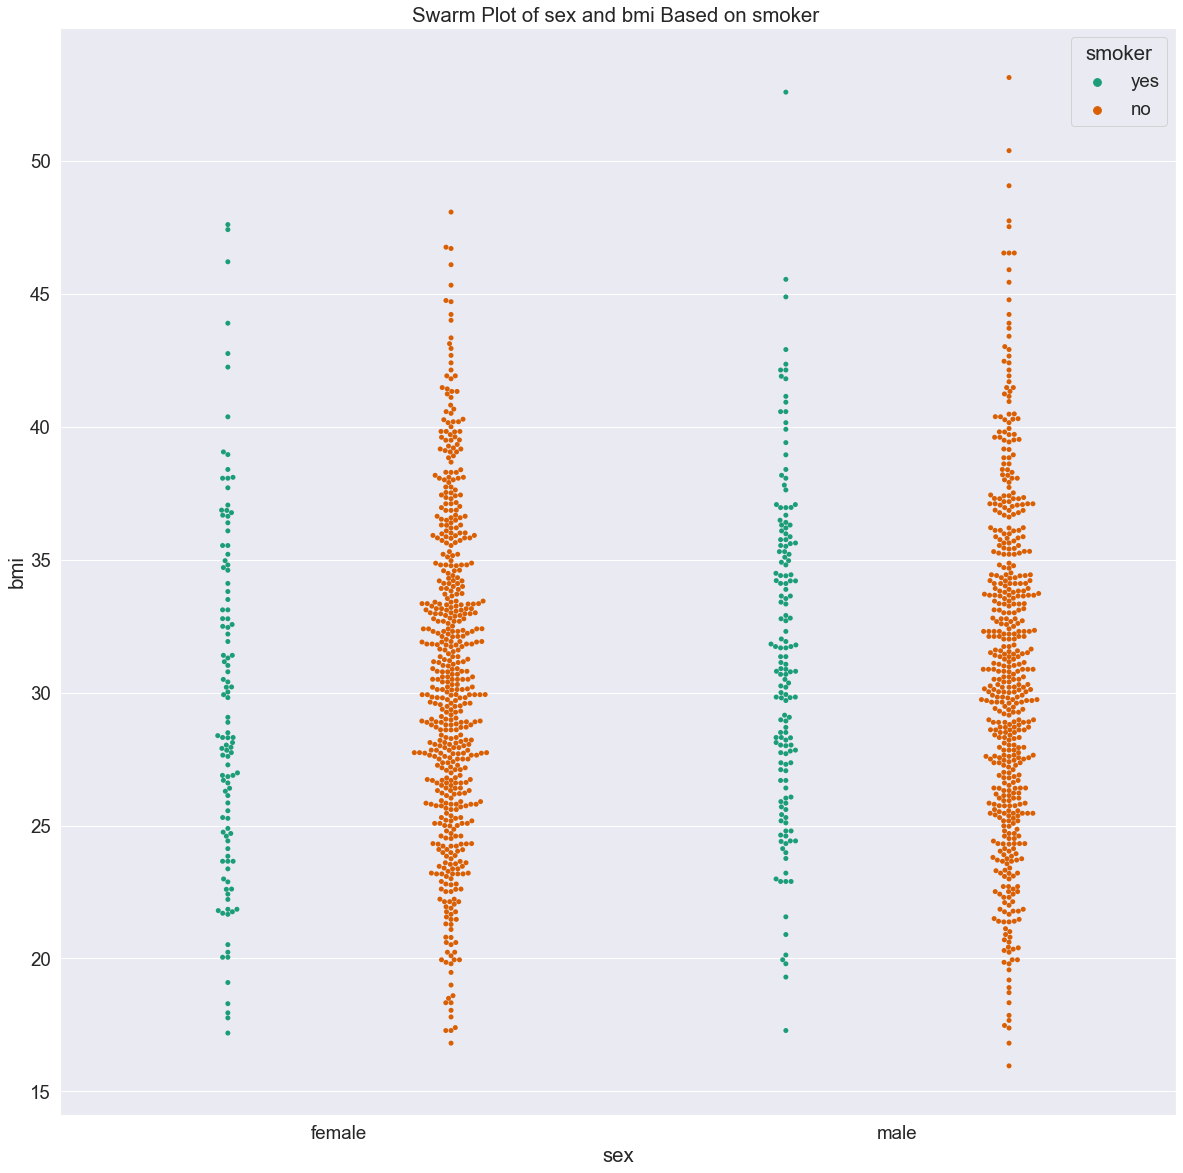

In [63]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "sex" , y = "bmi" , data = df ,hue = "smoker" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of sex and bmi Based on smoker ")

In [64]:
df.head(2)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

Text(0.5, 1.0, 'Box Plot of region and charges Based on income ')

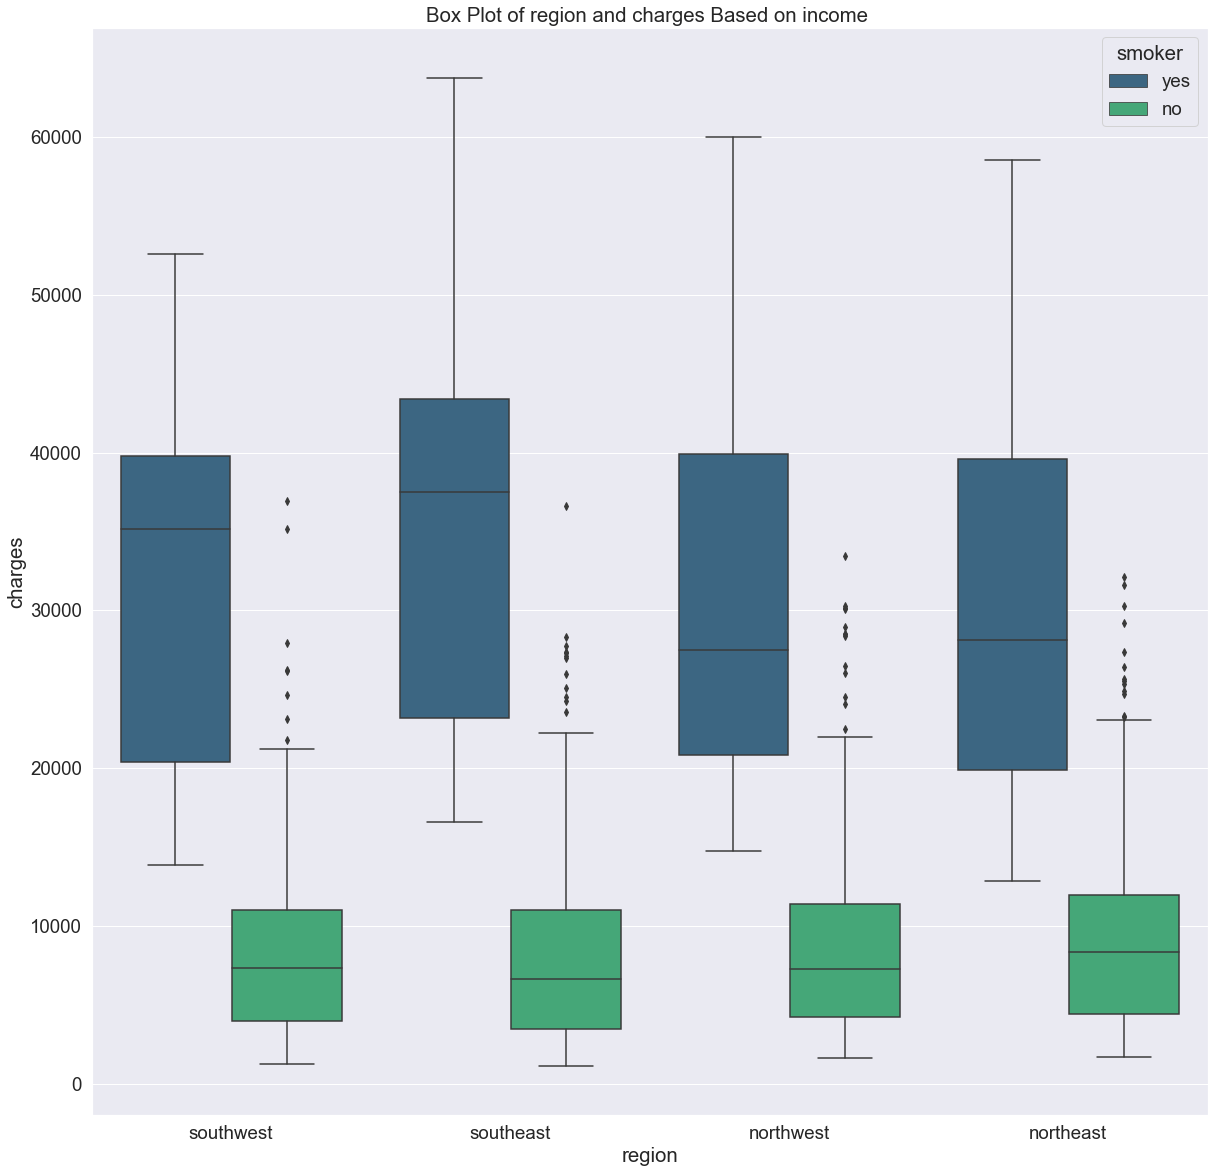

In [65]:
sns.boxplot( x = "region" , y = "charges" , data = df ,hue = "smoker" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of region and charges Based on income ")

Text(0.5, 1.0, 'Box Plot of sex and bmi Based on income ')

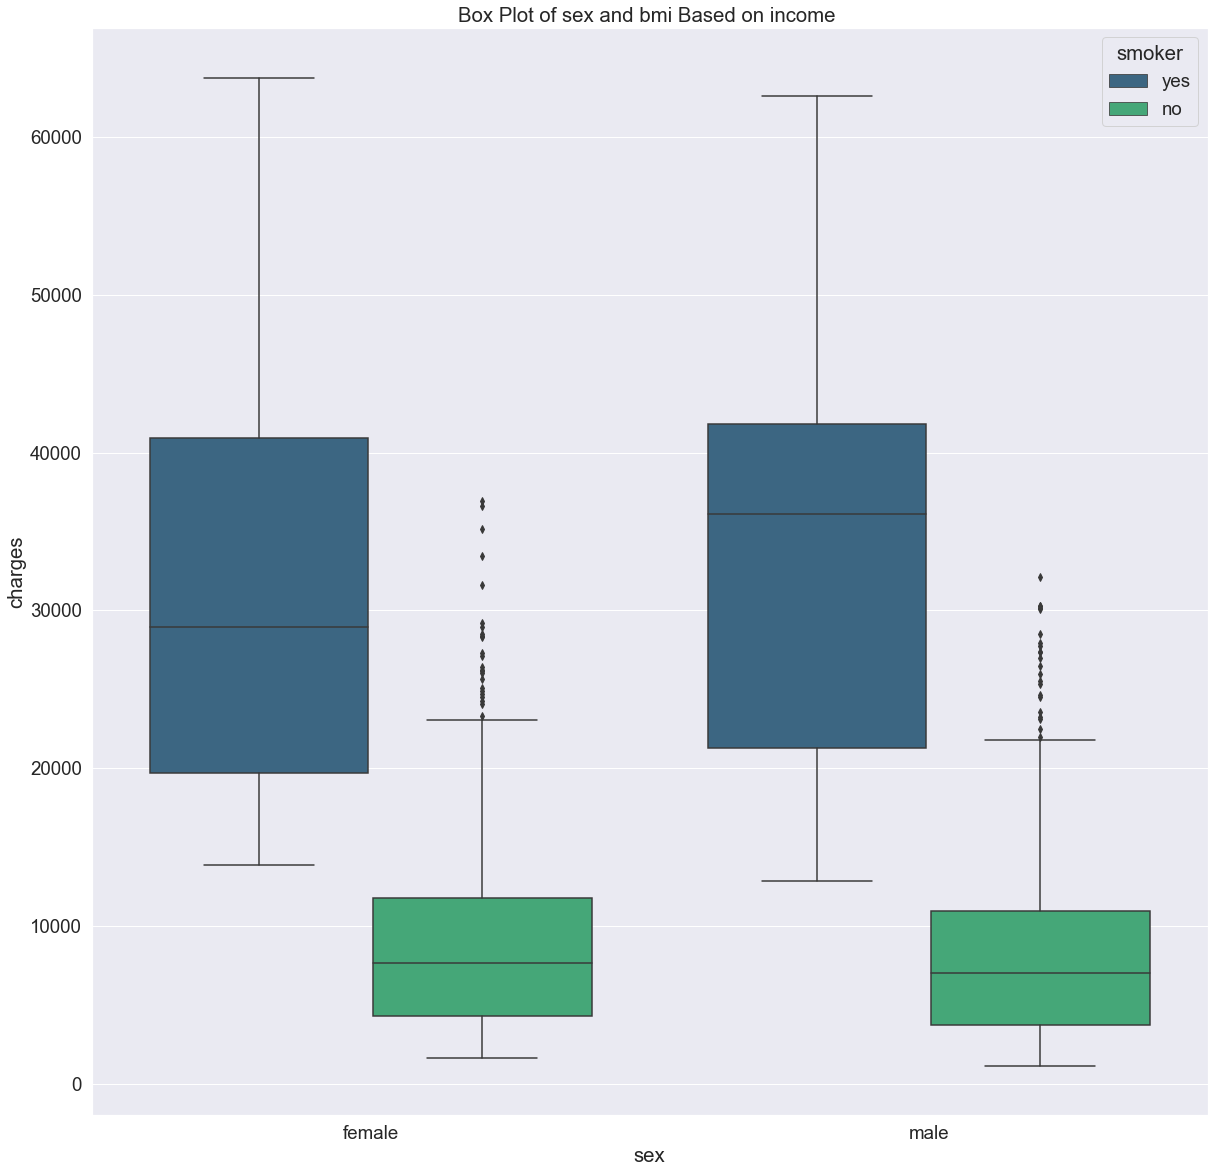

In [66]:
sns.boxplot( x = "sex" , y = "charges" , data = df ,hue = "smoker" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of sex and bmi Based on income ")

Text(0.5, 1.0, 'Box Plot of children and charges Based on income ')

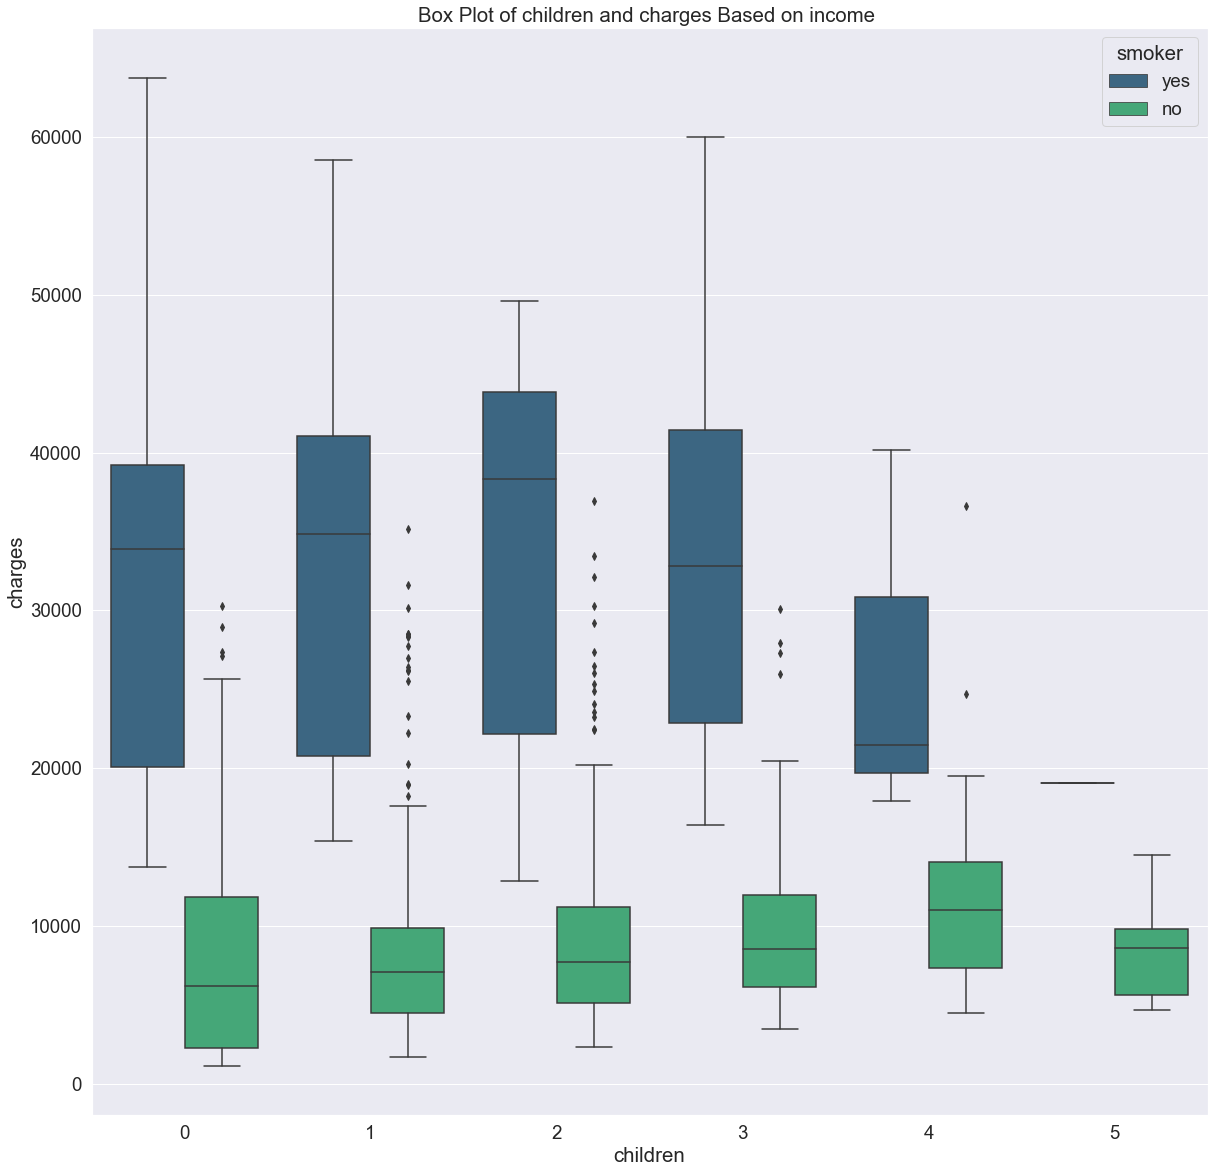

In [67]:
sns.boxplot( x = "children" , y = "charges" , data = df ,hue = "smoker" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of children and charges Based on income ")

In [68]:
df.head(2)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

Text(0.5, 1.0, 'Count Plot of sex  Based on smoker ')

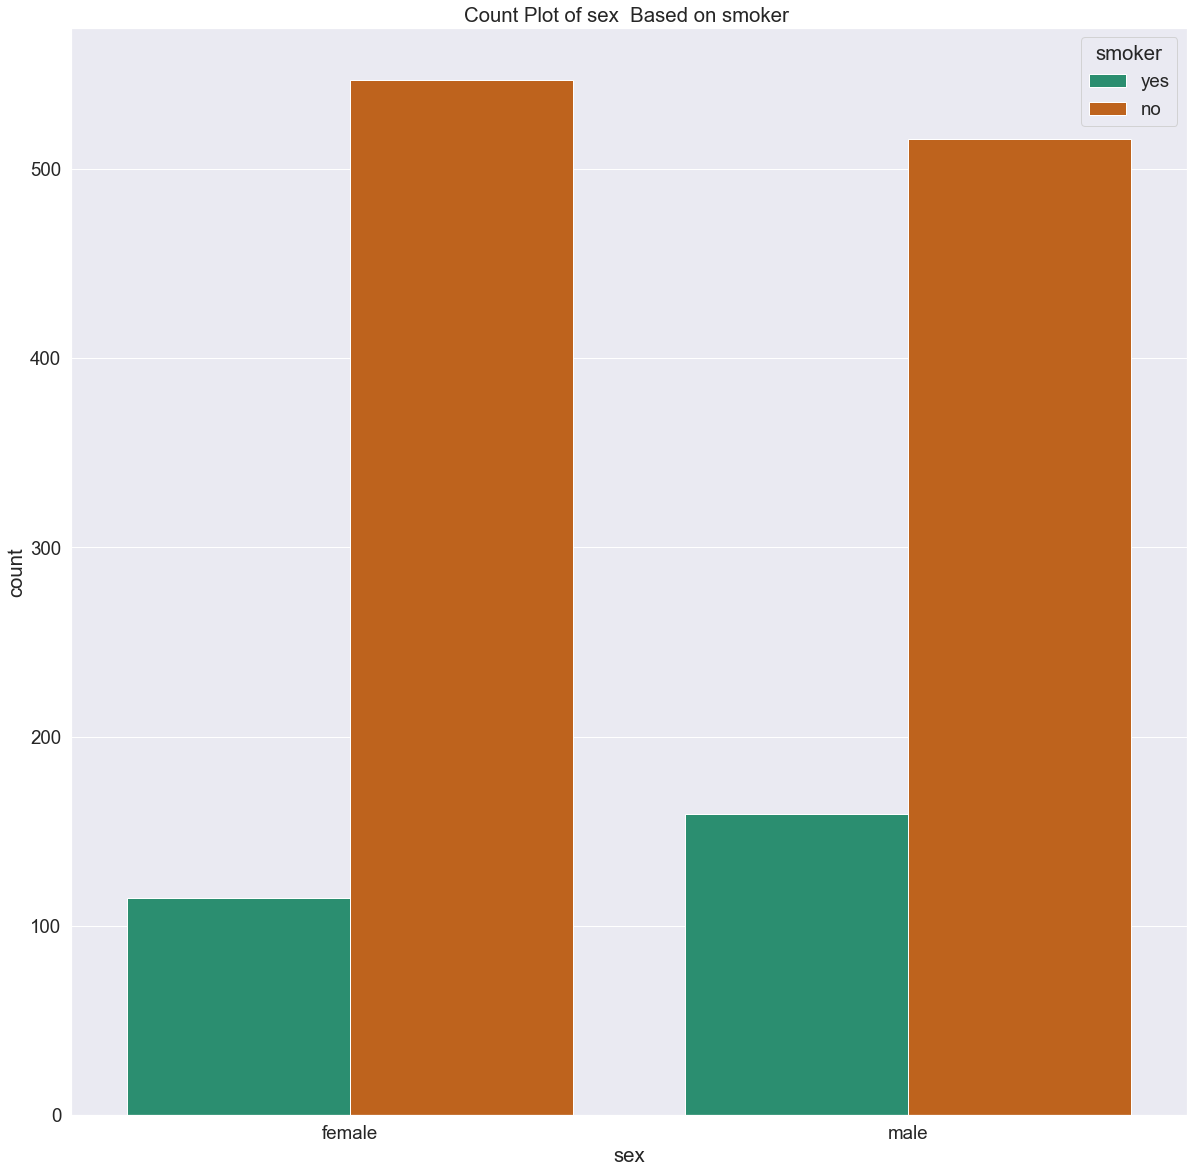

In [69]:
sns.countplot( x = "sex"  , data = df ,hue="smoker" , palette="Dark2")
plt.title("Count Plot of sex  Based on smoker ")


Text(0.5, 1.0, 'Count Plot of children  Based on smoker ')

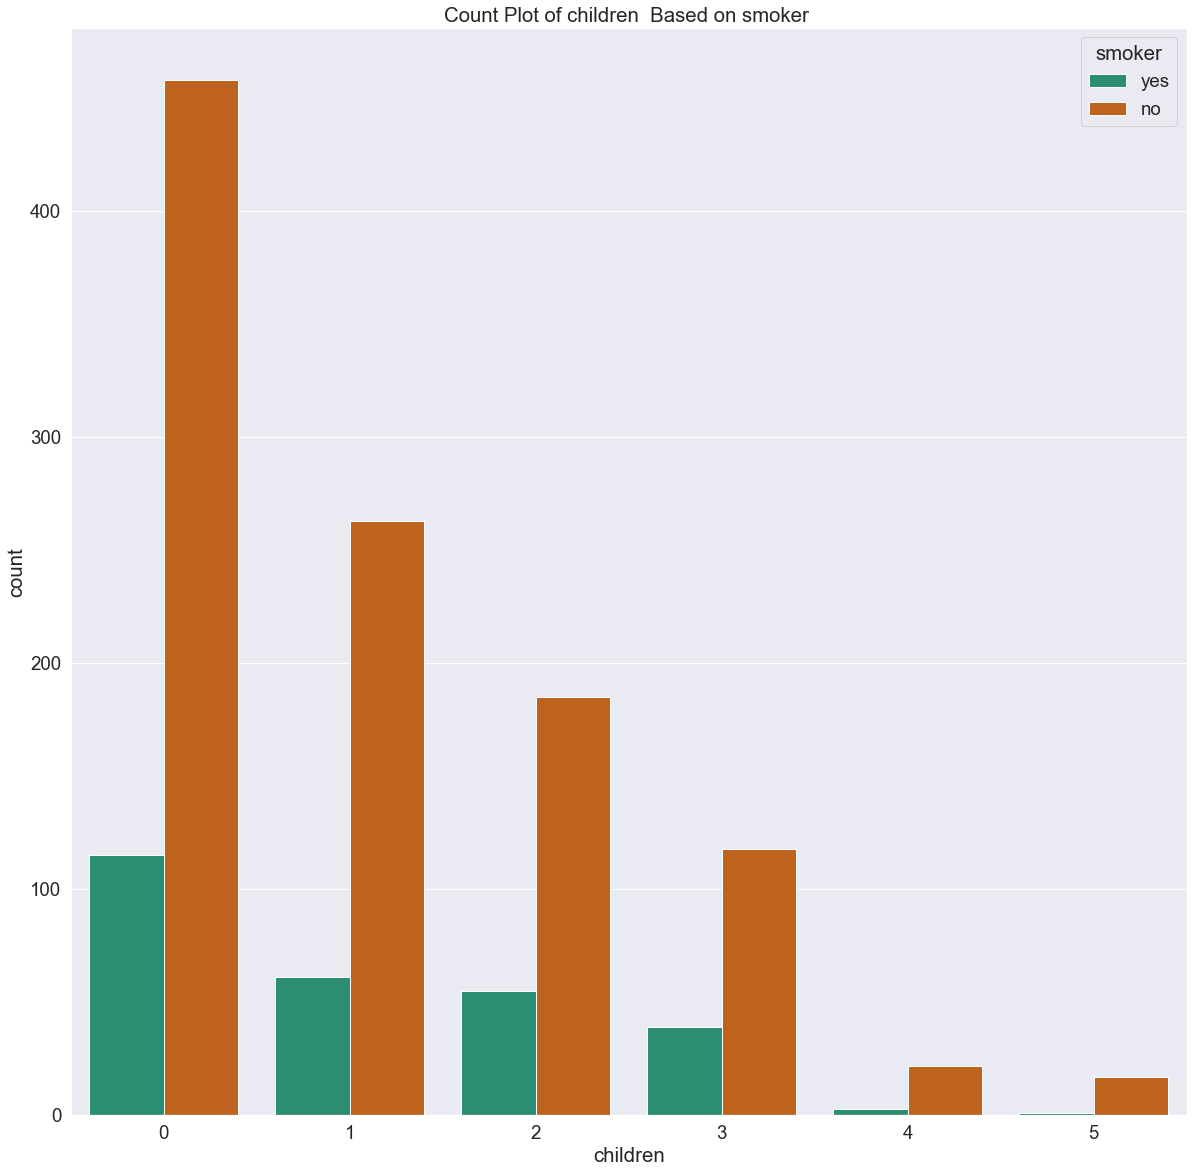

In [70]:
sns.countplot( x = "children"  , data = df ,hue="smoker" , palette="Dark2")
plt.title("Count Plot of children  Based on smoker ")


Text(0.5, 1.0, 'Count Plot of region  Based on smoker ')

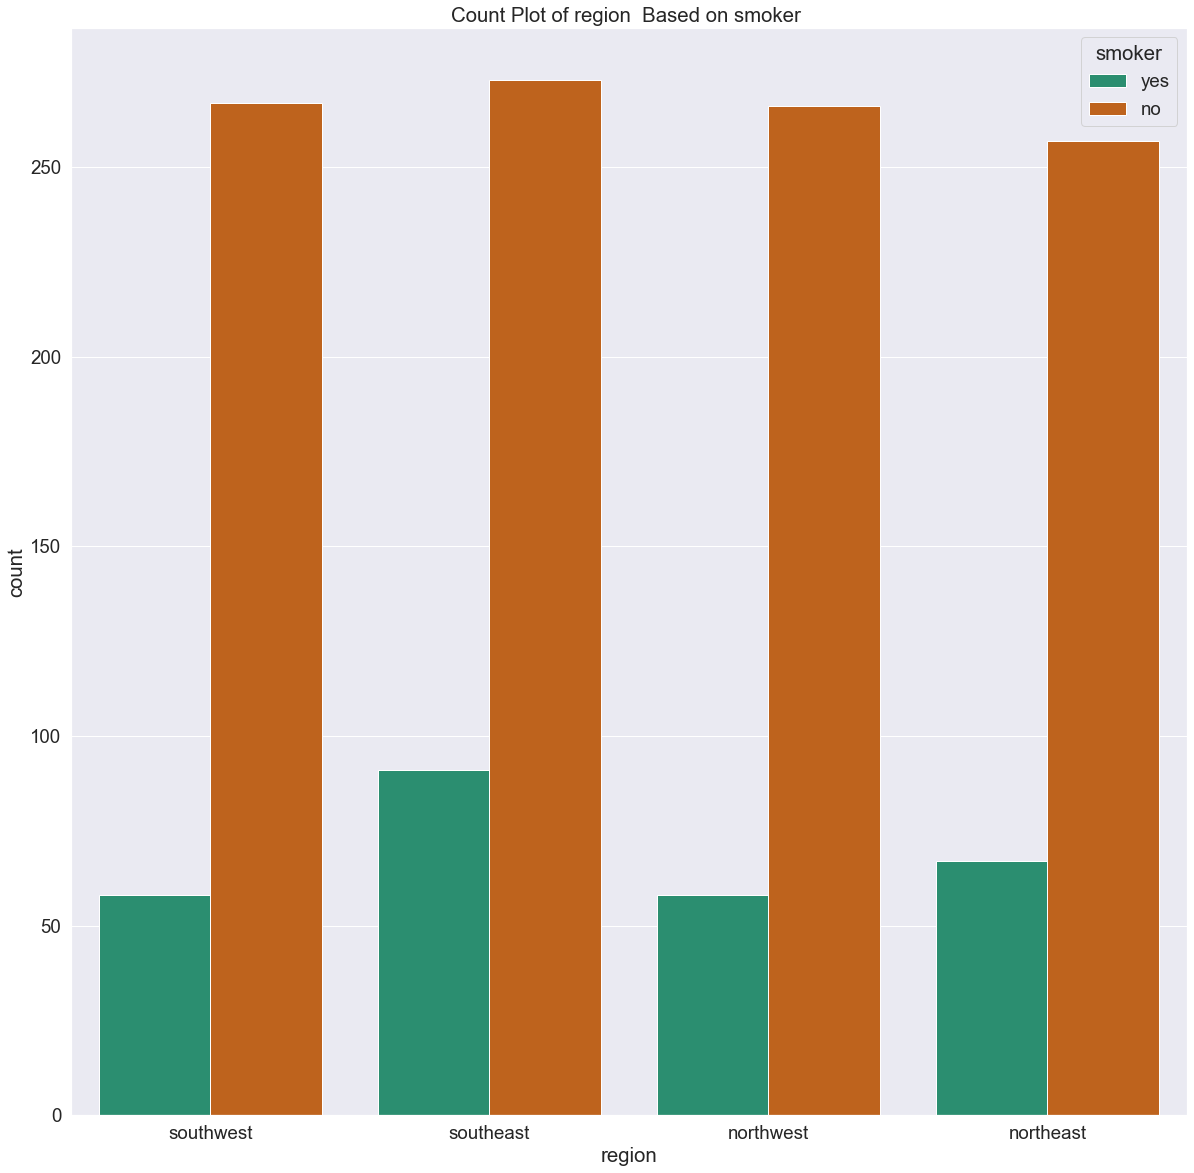

In [71]:
sns.countplot( x = "region"  , data = df ,hue="smoker" , palette="Dark2")
plt.title("Count Plot of region  Based on smoker ")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  Text(37, 0, '55')

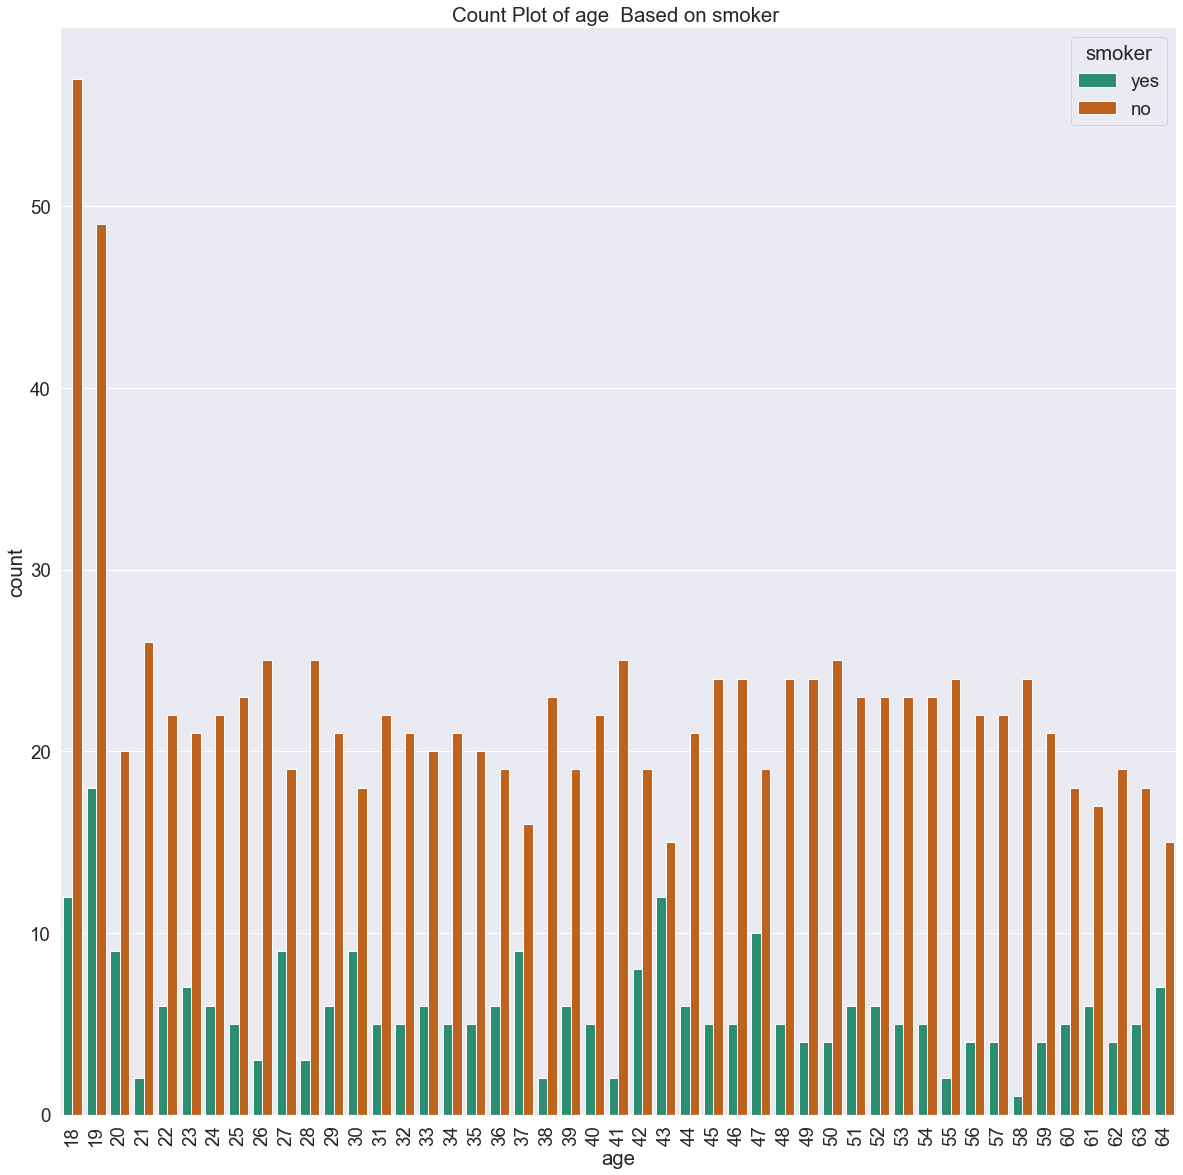

In [72]:
sns.countplot( x = "age"  , data = df ,hue="smoker" , palette="Dark2")
plt.title("Count Plot of age  Based on smoker ")
plt.xticks(rotation = 90)

In [73]:
# get describtion file of data ::

profile = pp.ProfileReport(df , title = "Medical_Person_Report" , explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [74]:
# To save report as html file
profile.to_file("Medical_Person_Data_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [75]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [76]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (age)

The Unique Values of (age) :: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


The Value_Counts of (age) :: 
18    69
19    67
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64
--------------------------------------------------------------------------------
The Col (sex)

The Unique Values of (sex) :: ['female' 'male']


The Value_Counts of (sex) :: 
male      675
female    662
Name: sex, dtype: int64
--------------------------------------------------------------------------------
The Col (bmi)

The Uniq

* From The result above we can see that data not include non-logic-data-values.

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [77]:
# detect duplicated data ::

df.duplicated().sum()

0

In [78]:
# To confirm that ::
df.drop_duplicates(inplace=True)

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [79]:
# detect missing data values ::

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [80]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
age                 0           0.0
sex                 0           0.0
bmi                 0           0.0
children            0           0.0
smoker              0           0.0
region              0           0.0
charges             0           0.0

* From The result above we can see that data not include Missing-data-values.

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.


In [81]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:ylabel='age'>

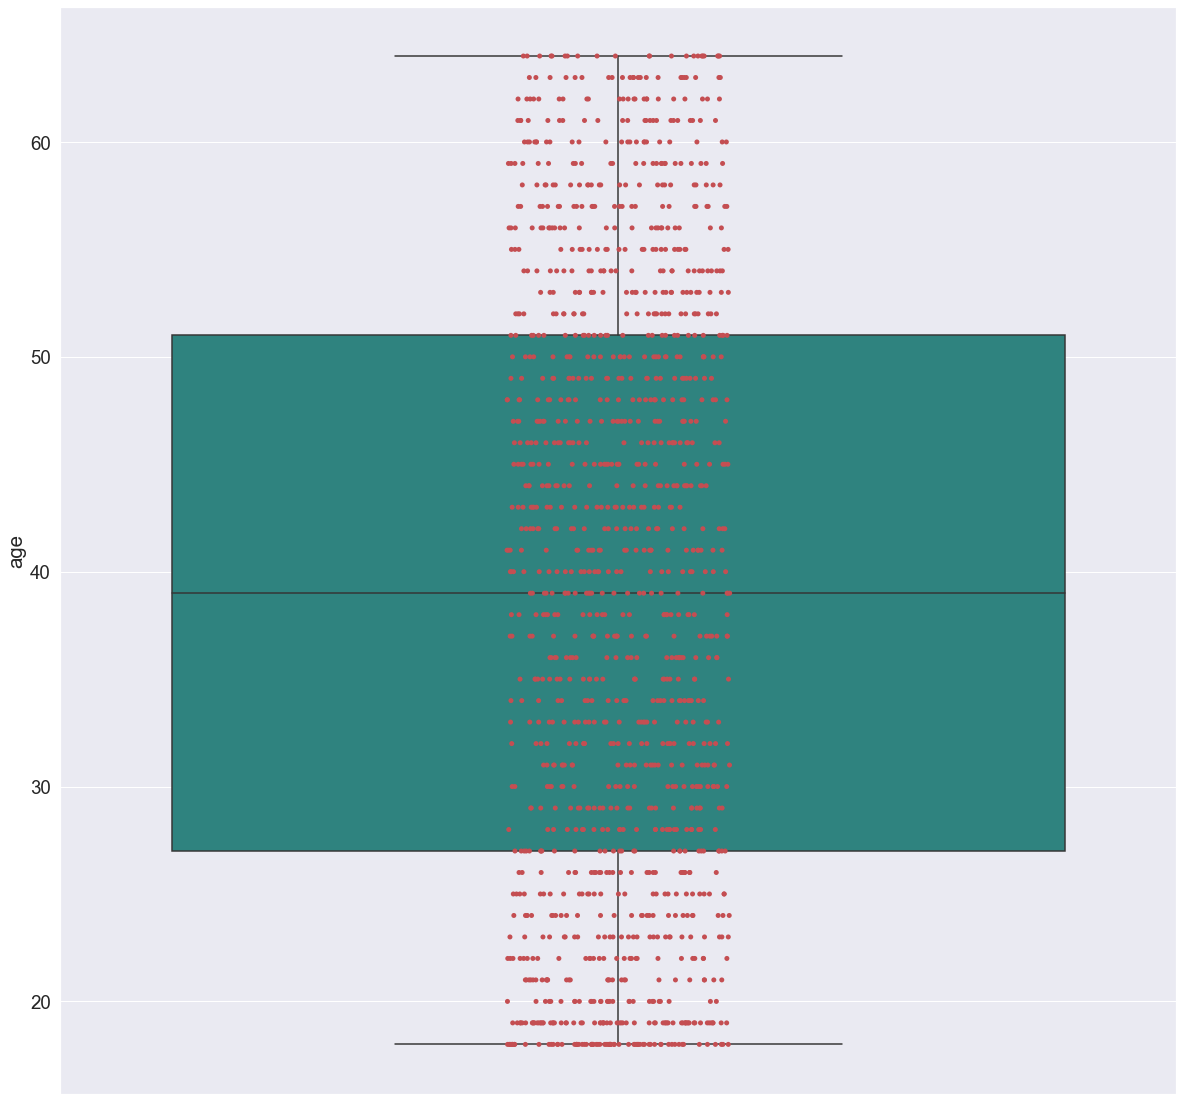

In [82]:
# detect outliers values in age feature ::

sns.boxplot  (y = "age" , data = df , palette="viridis")
sns.stripplot(y = "age" , data = df , color = "r")

<AxesSubplot:ylabel='bmi'>

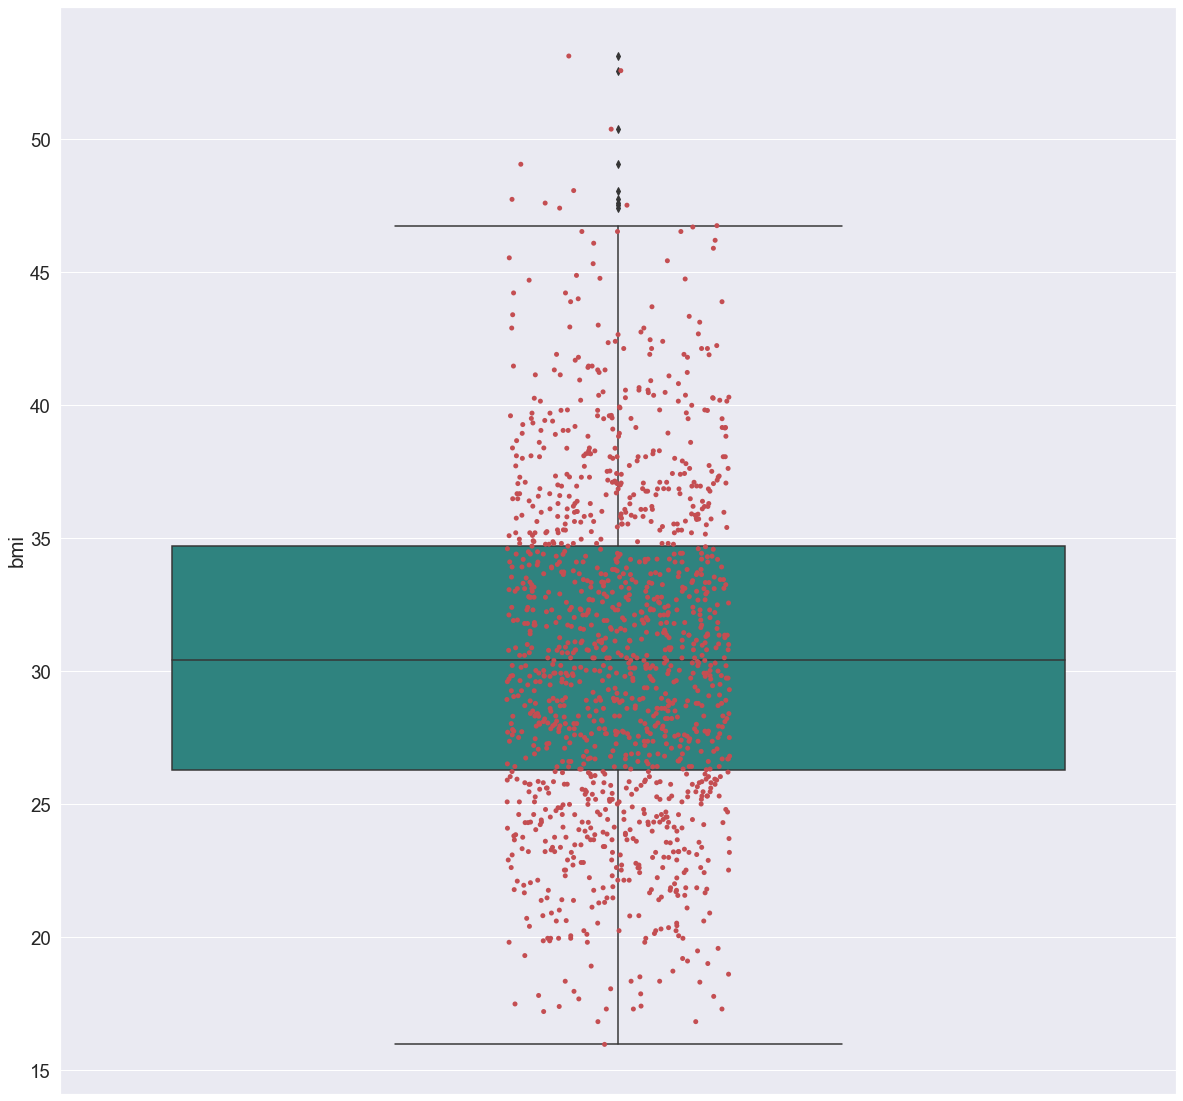

In [83]:
# detect outliers values in culmen_length_mm feature ::

sns.boxplot  (y = "bmi" , data = df , palette="viridis")
sns.stripplot(y = "bmi" , data = df , color = "r")

<AxesSubplot:ylabel='charges'>

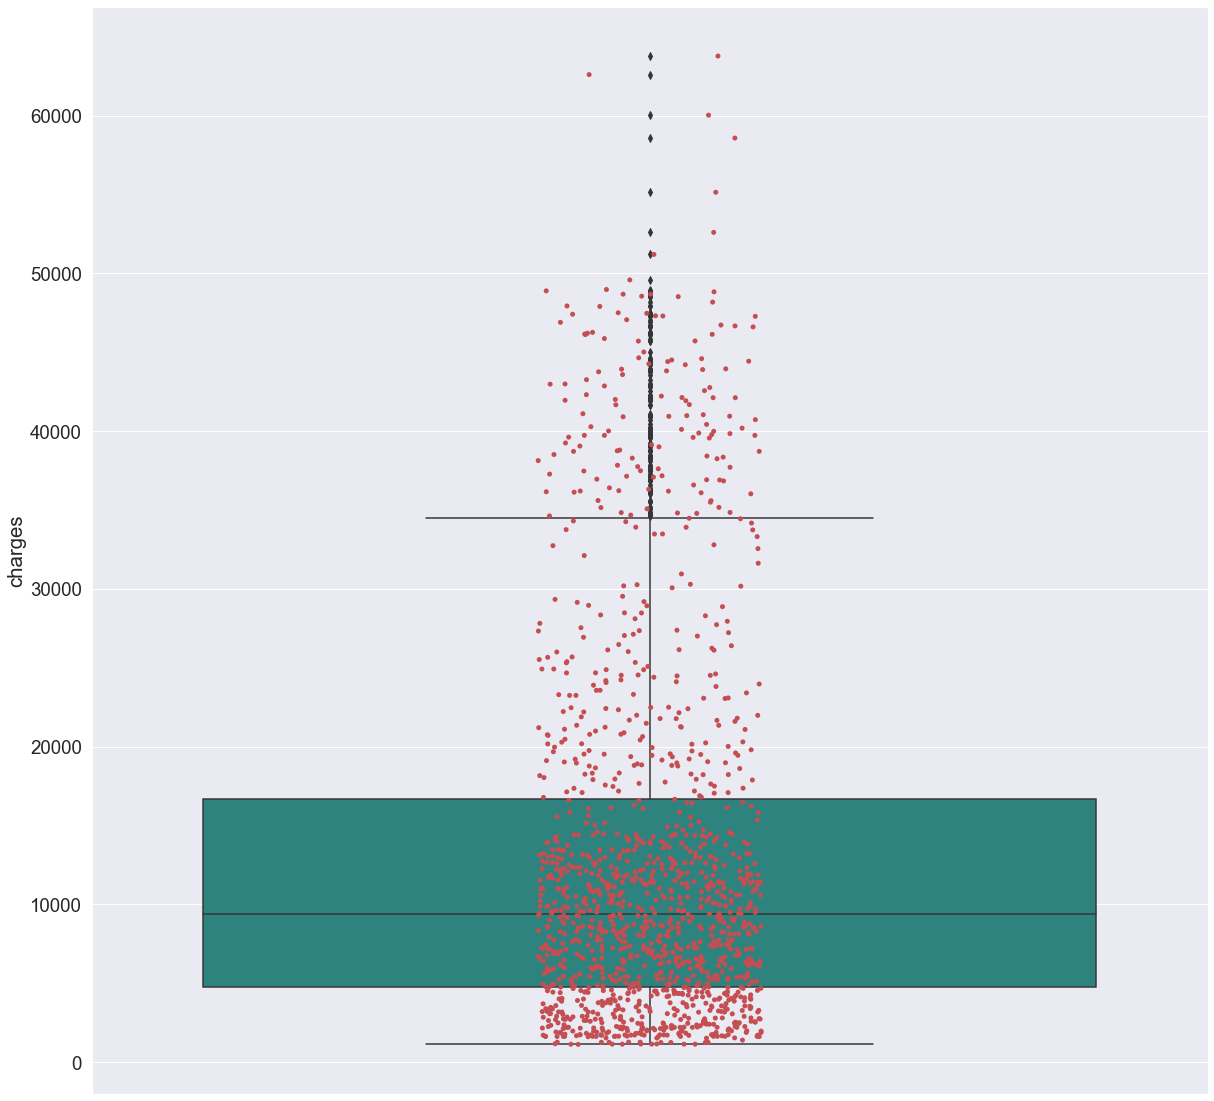

In [84]:
# detect outliers values in charges feature ::

sns.boxplot  (y = "charges" , data = df , palette="viridis")
sns.stripplot(y = "charges" , data = df , color = "r")

* From the result above we can see outliers in Charges Feature So that on that case we will replace that outlier values..

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.


In [85]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [86]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})

In [87]:
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})

In [88]:
region_dummy = pd.get_dummies(df["region"], prefix="region_", drop_first=True, dtype=int)
region_dummy

region__northwest  region__southeast  region__southwest
0                     0                  0                  1
1                     0                  1                  0
2                     0                  1                  0
3                     1                  0                  0
4                     1                  0                  0
...                 ...                ...                ...
1333                  1                  0                  0
1334                  0                  0                  0
1335                  0                  1                  0
1336                  0                  0                  1
1337                  1                  0                  0

[1337 rows x 3 columns]

In [89]:
df = pd.concat([df, region_dummy], axis=1)


In [90]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'region__northwest', 'region__southeast', 'region__southwest'],
      dtype='object')

In [91]:
df.head(2)

age  sex    bmi  children  smoker     region     charges  \
0   19    0  27.90         0       1  southwest  16884.9240   
1   18    1  33.77         1       0  southeast   1725.5523   

   region__northwest  region__southeast  region__southwest  
0                  0                  0                  1  
1                  0                  1                  0

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'bmi'),
  Text(0, 3.5, 'children'),
  Text(0, 4.5, 'smoker'),
  Text(0, 5.5, 'region'),
  Text(0, 6.5, 'charges'),
  Text(0, 7.5, 'region__northwest'),
  Text(0, 8.5, 'region__southeast'),
  Text(0, 9.5, 'region__southwest')])

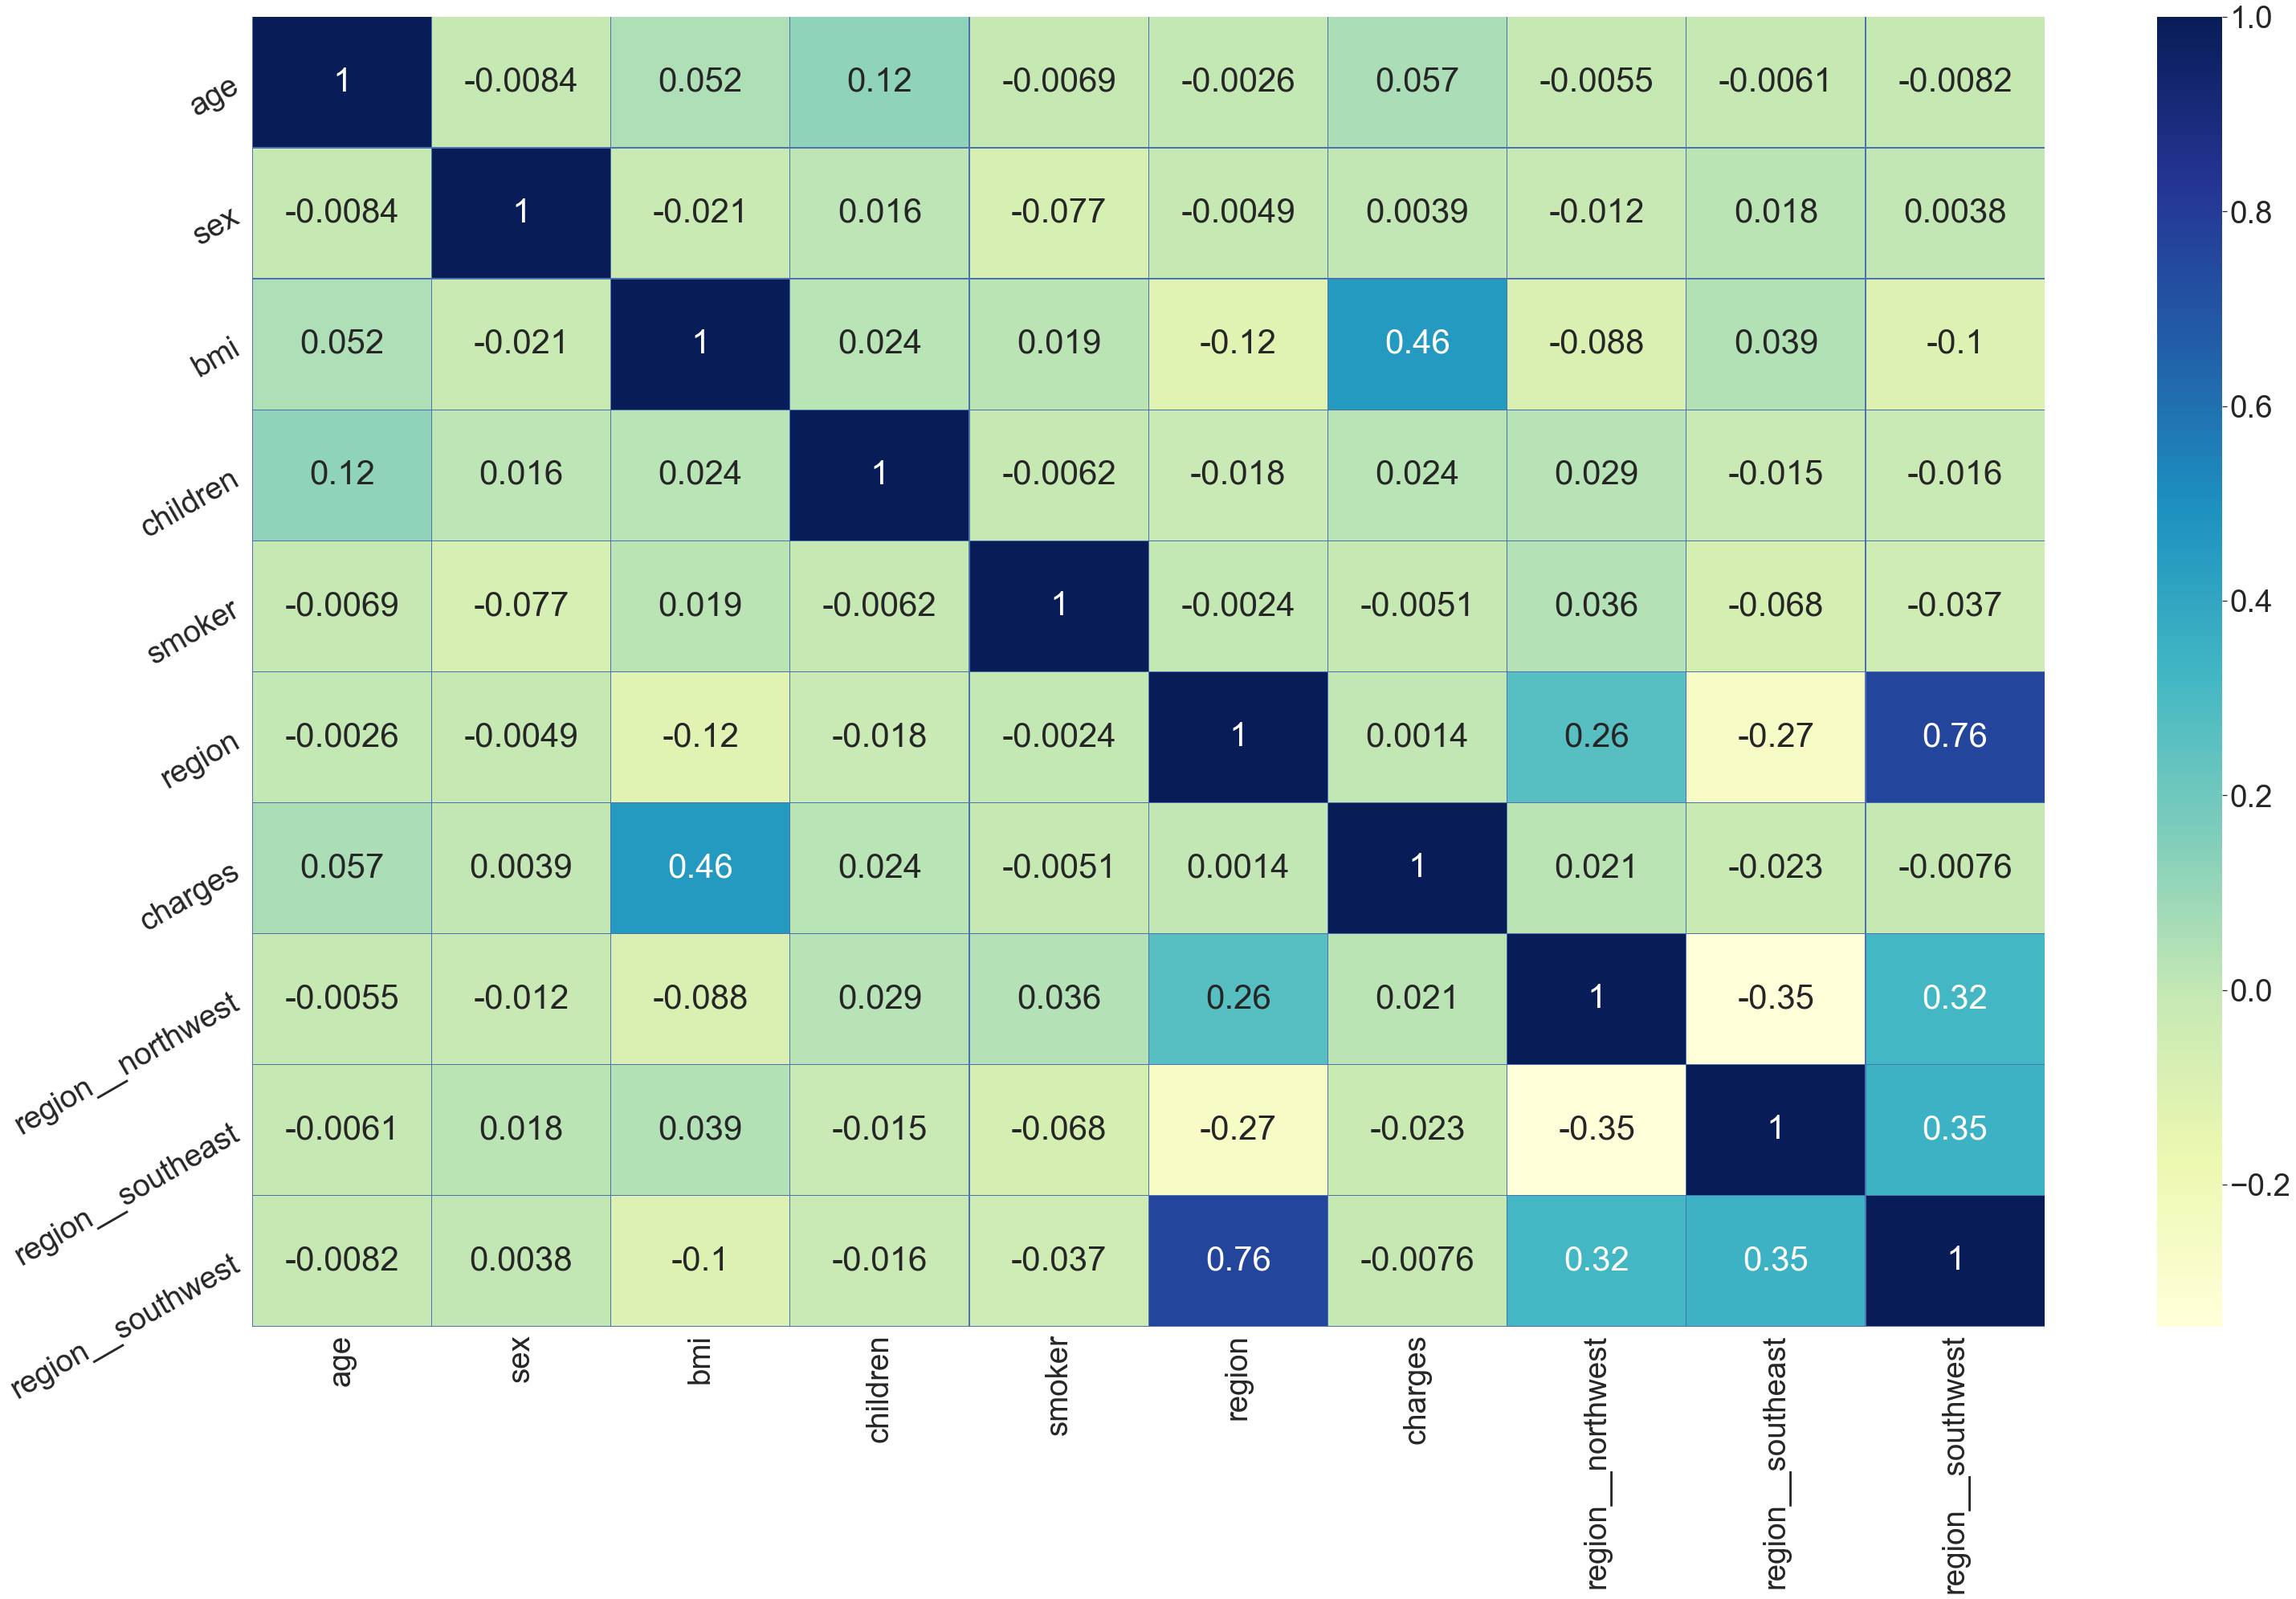

In [92]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [50 , 30]} , font_scale=3.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")
plt.yticks(rotation = 30)


<AxesSubplot:>

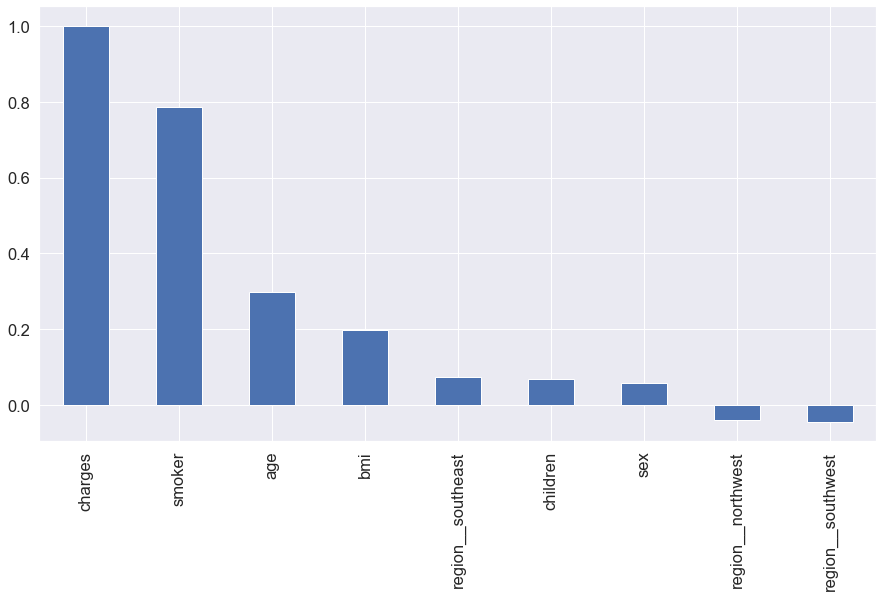

In [93]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=1.5)

plt.figure(figsize=(15,8))
df.corr()['charges'].sort_values(ascending = False).plot(kind='bar'  )

# 3 :: Feture selection ::
***************************************************
* There are multi technices to get the most Correlation Columns with our target.

<p id = "Prepration">Data-Prepration</p>

In [94]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'region__northwest', 'region__southeast', 'region__southwest'],
      dtype='object')

In [95]:
# Split data into input and output data
x = df.drop(["charges" , "region"], axis=1 )
y = df["charges"]

In [96]:
x

age  sex     bmi  children  smoker  region__northwest  \
0      19    0  27.900         0       1                  0   
1      18    1  33.770         1       0                  0   
2      28    1  33.000         3       0                  0   
3      33    1  22.705         0       0                  1   
4      32    1  28.880         0       0                  1   
...   ...  ...     ...       ...     ...                ...   
1333   50    1  30.970         3       0                  1   
1334   18    0  31.920         0       0                  0   
1335   18    0  36.850         0       0                  0   
1336   21    0  25.800         0       0                  0   
1337   61    0  29.070         0       1                  1   

      region__southeast  region__southwest  
0                     0                  1  
1                     1                  0  
2                     1                  0  
3                     0                  0  
4                     0                  0  
...                 ...                ...  
1333                  0                  0  
1334                  0                  0  
1335                  1                  0  
1336                  0                  1  
1337                  0                  0  

[1337 rows x 8 columns]

In [97]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [98]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [99]:
#Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1337 non-null   int64  
 1   sex                1337 non-null   int64  
 2   bmi                1337 non-null   float64
 3   children           1337 non-null   int64  
 4   smoker             1337 non-null   int64  
 5   region             1337 non-null   object 
 6   charges            1337 non-null   float64
 7   region__northwest  1337 non-null   int32  
 8   region__southeast  1337 non-null   int32  
 9   region__southwest  1337 non-null   int32  
dtypes: float64(2), int32(3), int64(4), object(1)
memory usage: 99.2+ KB


<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [101]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm          import SVR
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestRegressor
from sklearn.neighbors    import KNeighborsRegressor
from xgboost              import XGBRegressor
from sklearn.metrics      import  mean_absolute_error , mean_squared_error , r2_score 


In [102]:
Models = { "Linear_Regressor" : LinearRegression(),
           "Ridge_Regressor"  : Ridge(),
           "Lasso_Regressor"  : Lasso(),
           "SVRegressor"      : SVR(),
           "DTRegressor"      : DecisionTreeRegressor(),
           "RFRegressor"      : RandomForestRegressor(),
           "KNNRegressor"     : KNeighborsRegressor(),
           "XGBRegressor"     : XGBRegressor()
         }

In [103]:
for name , model in Models.items() :
    print(f"The Model :: {name}")
    model.fit(x_train , y_train)
    Train_Score = model.score(x_train , y_train)
    Test_Score  = model.score(x_test , y_test)
    print(f"The Training_Score :: {Train_Score}\nThe Test_Score :: {Test_Score}")
    print("*" *80)

The Model :: Linear_Regressor
The Training_Score :: 0.7375799098259619
The Test_Score :: 0.7995820459668895
********************************************************************************
The Model :: Ridge_Regressor
The Training_Score :: 0.7375792325865271
The Test_Score :: 0.7995200516113775
********************************************************************************
The Model :: Lasso_Regressor
The Training_Score :: 0.7375798053922921
The Test_Score :: 0.7995901267980583
********************************************************************************
The Model :: SVRegressor
The Training_Score :: -0.10458981986314342
The Test_Score :: -0.11027873971240676
********************************************************************************
The Model :: DTRegressor
The Training_Score :: 0.9983214709669678
The Test_Score :: 0.7255853483422176
********************************************************************************
The Model :: RFRegressor
The Training_Score :: 0.97416110588117

* Select the Most Efficient Model which have high Performance and Accuracy

In [104]:
RF_Model = RandomForestRegressor(criterion="mse" , random_state =20 ,oob_score = True, n_estimators=100 , max_depth=100, n_jobs=-1 )
RF_Model.fit(x_train , y_train)
print(RF_Model.score(x_train , y_train))
print(RF_Model.score(x_test , y_test))
print("-" * 80)

0.9750434190843973
0.875899168187136
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [105]:
RF_Model.score(x_train , y_train)

0.9750434190843973

In [106]:
RF_Model.score(x_test , y_test)

0.875899168187136

In [107]:
y_pred = RF_Model.predict(x_test)

In [108]:
MAE = mean_absolute_error(y_test , y_pred  , multioutput="uniform_average")
MSE = mean_squared_error(y_test , y_pred , multioutput="uniform_average")
r2_square = r2_score(y_test , y_pred , multioutput="uniform_average")
print(f"The MAE :: {MAE}\n*************\nThe MSE :: {MSE}\n************\nThe r2_Score :: {r2_square}")

The MAE :: 2543.507649596361
*************
The MSE :: 18633189.290234245
************
The r2_Score :: 0.875899168187136


<p id = "Save">Save_Model</p>

In [110]:
import joblib

In [111]:
scaler = joblib.dump(scaller , "scaler.h5")

In [112]:
Model = joblib.dump(RF_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict medical-personal-charges .

In [113]:
df.head(2)

age  sex    bmi  children  smoker     region     charges  \
0   19    0  27.90         0       1  southwest  16884.9240   
1   18    1  33.77         1       0  southeast   1725.5523   

   region__northwest  region__southeast  region__southwest  
0                  0                  0                  1  
1                  0                  1                  0

In [114]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region__northwest',
       'region__southeast', 'region__southwest'],
      dtype='object')

In [115]:
len(x.columns)

8

In [118]:
custom_data = np.array([25 , 1 , 35.50 , 2 , 0 , 0 , 0 , 0])

In [119]:
custom_data.shape

(8,)

In [120]:
len(custom_data)

8

In [121]:
custom_data = scaller.transform([custom_data])
custom_data

array([[-0.9871552 ,  0.99719757,  0.80987036,  0.7521372 , -0.5105029 ,
        -0.57410974, -0.5971591 , -0.57410974]])

In [124]:
prediction = RF_Model.predict(custom_data)
prediction

array([8298.644159])